In [1]:
!pip install -r requirements.txt

You should consider upgrading via the 'c:\users\z840\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import investpy
import time
import pandas as pd
import numpy as np
import quantstats as qs
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [3]:
etfs = investpy.get_etfs(country='united states')

In [4]:
etf_tickers = ["XLB", # Materials. 1998-12-22
               "XLE", # Energy. 1998-12-22
               "XLF", # Financial. 1998-12-22
               "XLI", # Industrial. 1998-12-22
               "XLK", # Technology. 1998-12-22
               "XLP", # Consumer Saples. 1998-12-22  (productos básicos de consumo)
               "XLU", # Utilities. 1998-12-22
               "XLV", # Health Care. 1998-12-22
               "XLY", # Consumer Discretionary. 1998-12-22
               "GLD", # Oro. 2004-11-18 *******************************
               "SHV", # Short Treasury Bond. 2007-01-11 ***************
               "SHY", # 1-3 Year Treasury Bond. 2002-07-30
               "IEI", # 3-7 Year Treasury Bond. 2007-01-11 ************
               "IEF", # 7-10 Year Treasury Bond. 2002-07-30
               "TLH", # 10-20 Year Treasury Bond. 2007-01-11 **********
               "TLT", # +20 Year Treasury Bond. 2002-07-30
               "TIP", # Bonos ligados a la inflacción. 2003-12-05 *****
               "ICF", # Inmobiliario. 2001-02-02
               "IYZ", # Telecomunicaciones. 2000-05-22
               'HYG' # High Yield. 2007
               ]



In [5]:
etf_highYield = ['HYG', 'PHB', 'JNK', 'BKLN']

In [6]:
datayf_hy = yf.download(# tickers list or string as well
        tickers = etf_highYield,

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "max",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None)



[*********************100%***********************]  4 of 4 completed


In [7]:
closeyf_hy = datayf_hy.xs('Close',level=1,axis=1)
#closeyf.plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

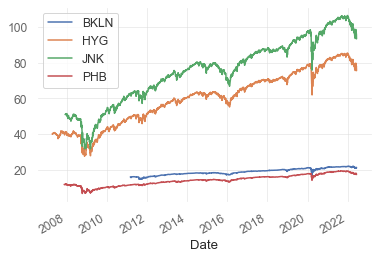

In [8]:
closeyf_hy.plot()

HYG es el que tiene más histórico y encaja mejor por fechas

In [9]:
closeyf_hy.loc[:,'HYG']

Date
2007-04-11    40.048347
2007-04-12    40.075249
2007-04-13    40.002327
2007-04-16    39.986969
2007-04-17    39.967770
                ...    
2022-06-06    78.050003
2022-06-07    78.230003
2022-06-08    77.559998
2022-06-09    76.940002
2022-06-10    75.629997
Name: HYG, Length: 3821, dtype: float64

In [10]:
datayf = yf.download(# tickers list or string as well
        tickers = etf_tickers,

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "max",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None)



[*********************100%***********************]  20 of 20 completed


In [11]:
closeyf = datayf.xs('Close',level=1,axis=1)
#closeyf.plot(figsize=(20,10))

In [12]:
closeyf.to_csv('datosCierre.csv')

In [13]:
max_first_valid_index = pd.Timestamp('1900-01-01')
for col_name in closeyf.columns.sort_values():
  data = closeyf[col_name]

  if max_first_valid_index < data.first_valid_index():
    max_first_valid_index = data.first_valid_index()

  print(f"{col_name} --> desde {data.first_valid_index()} hasta {data.last_valid_index()} --> {etfs[(etfs.symbol == col_name) & (etfs.country == 'united states')].name.iloc[0]}")

# Descartamos algún dato, para empezar todo desde el mismo punto
closeyf = closeyf.loc[max_first_valid_index:,]
#closeyf.plot(figsize=(20,10))

GLD --> desde 2004-11-18 00:00:00 hasta 2022-06-10 00:00:00 --> SPDR Gold Shares
HYG --> desde 2007-04-11 00:00:00 hasta 2022-06-10 00:00:00 --> iShares iBoxx $ High Yield Corporate Bond
ICF --> desde 2001-02-02 00:00:00 hasta 2022-06-10 00:00:00 --> iShares Cohen & Steers REIT
IEF --> desde 2002-07-30 00:00:00 hasta 2022-06-10 00:00:00 --> iShares 7-10 Year Treasury Bond
IEI --> desde 2007-01-11 00:00:00 hasta 2022-06-10 00:00:00 --> iShares 3-7 Year Treasury Bond
IYZ --> desde 2000-05-26 00:00:00 hasta 2022-06-10 00:00:00 --> iShares US Telecommunications
SHV --> desde 2007-01-11 00:00:00 hasta 2022-06-10 00:00:00 --> iShares Short Treasury Bond
SHY --> desde 2002-07-30 00:00:00 hasta 2022-06-10 00:00:00 --> iShares 1-3 Year Treasury Bond
TIP --> desde 2003-12-05 00:00:00 hasta 2022-06-10 00:00:00 --> iShares TIPS Bond
TLH --> desde 2007-01-11 00:00:00 hasta 2022-06-10 00:00:00 --> iShares 10-20 Year Treasury Bond
TLT --> desde 2002-07-30 00:00:00 hasta 2022-06-10 00:00:00 --> iShare

<AxesSubplot:xlabel='Date'>

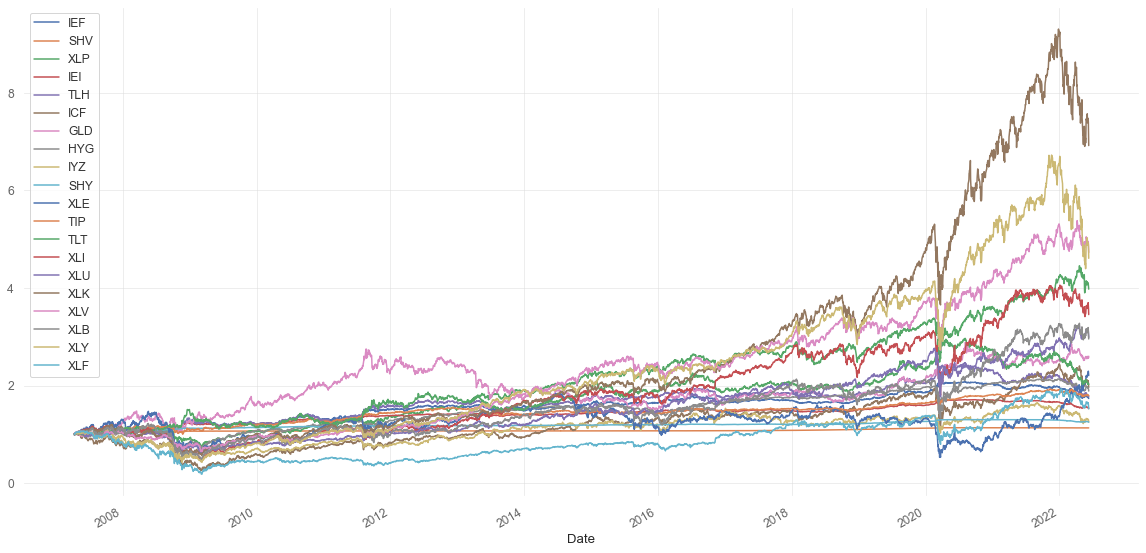

In [14]:
(closeyf/closeyf.iloc[0,]).plot(figsize=(20,10))

In [15]:
# Se calcula en un nuevo DF los retornos logaritmicos
logReturns = pd.DataFrame()
for column in closeyf.columns:
  logReturns[column] = np.log(closeyf[column]/closeyf[column].shift(1)).iloc[1:]

logReturns

,IEF,SHV,XLP,IEI,TLH,ICF,GLD,HYG,IYZ,SHY,XLE,TIP,TLT,XLI,XLU,XLK,XLV,XLB,XLY,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-12,0.000971,0.000275,0.001112,-0.000199,0.001001,-0.007489,-0.001343,0.000671,0.006683,-0.000124,0.015189,0.000000,0.000230,0.011993,-0.004409,0.010529,0.011231,0.008803,0.006971,-0.001686
2007-04-13,-0.001699,0.000183,0.003328,-0.001097,-0.002105,0.014442,0.012609,-0.001821,0.004430,-0.000500,0.000476,-0.002498,-0.003095,-0.000277,-0.000246,0.000837,0.014499,0.002318,0.000771,0.004211
2007-04-16,0.001092,0.000183,0.002212,0.000698,0.003506,-0.002602,0.008221,-0.000385,0.009741,-0.000125,0.005852,0.003197,0.005495,0.008010,0.005877,0.008337,0.009551,0.013286,0.009976,0.024077
2007-04-17,0.004238,0.000092,0.009166,0.003186,0.004390,0.014178,-0.005865,-0.000479,-0.001252,0.001622,-0.005693,0.000598,0.005578,0.000000,0.004628,0.002073,0.003070,-0.009436,0.004064,-0.000273
2007-04-18,0.002292,0.000640,-0.002558,0.001490,0.003082,-0.005819,0.005573,0.000287,0.002502,0.001371,-0.003495,0.003283,0.004982,0.002747,0.007263,-0.002488,-0.000279,-0.005395,-0.000760,0.011423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-06,-0.007536,-0.000182,0.000406,-0.004021,-0.015592,-0.003877,-0.004413,-0.007531,0.001852,-0.001324,-0.001118,-0.006530,-0.018616,0.004177,0.004429,0.000071,0.000154,0.009417,0.009950,0.002864
2022-06-07,0.004020,0.000000,0.005267,0.001845,0.008489,0.012046,0.006497,0.002304,0.005534,0.000120,0.029425,0.002379,0.010742,0.013355,0.006008,0.011858,0.012932,0.007175,-0.002462,0.007691
2022-06-08,-0.003725,-0.000091,-0.012333,-0.001761,-0.007320,-0.024712,-0.000926,-0.008601,-0.001473,-0.000723,0.002170,-0.002464,-0.008900,-0.018265,-0.019760,-0.011358,-0.007938,-0.020986,-0.005921,-0.017750


In [16]:
closeyf.iloc[0:,:]

,IEF,SHV,XLP,IEI,TLH,ICF,GLD,HYG,IYZ,SHY,XLE,TIP,TLT,XLI,XLU,XLK,XLV,XLB,XLY,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-11,58.035957,97.161041,18.079161,77.098732,67.082314,30.897478,67.080002,40.048347,20.634249,65.979881,40.212608,65.258156,56.170326,26.281361,23.870903,18.941729,26.538860,27.625555,31.341772,21.357565
2007-04-12,58.092335,97.187752,18.099276,77.083389,67.149521,30.666950,66.989998,40.075241,20.772606,65.971680,40.828068,65.258156,56.183231,26.598450,23.765884,19.142214,26.838604,27.869829,31.561014,21.321577
2007-04-13,57.993732,97.205574,18.159605,76.998901,67.008347,31.113052,67.839996,40.002323,20.864840,65.938705,40.847507,65.095345,56.009640,26.591078,23.760042,19.158249,27.230576,27.934505,31.585358,21.411549
2007-04-16,58.057102,97.223373,18.199823,77.052704,67.243706,31.032215,68.400002,39.986942,21.069075,65.930489,41.087231,65.303757,56.318237,26.804928,23.900095,19.318640,27.491896,28.308125,31.902040,21.933336
2007-04-17,58.303661,97.232292,18.367409,77.298561,67.539543,31.475313,68.000000,39.967793,21.042721,66.037498,40.853981,65.342819,56.633259,26.804928,24.010952,19.358730,27.576435,28.042271,32.031952,21.927340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-06,101.790001,110.169998,73.849998,119.139999,119.639999,64.164543,171.820007,78.050003,26.877621,83.010002,89.410004,117.540001,113.889999,95.949997,74.680000,140.000000,129.839996,87.489998,154.529999,34.970001
2022-06-07,102.199997,110.169998,74.239998,119.360001,120.660004,64.942169,172.940002,78.230003,27.026775,83.019997,92.080002,117.820000,115.120003,97.239998,75.129997,141.669998,131.529999,88.120003,154.149994,35.240002
2022-06-08,101.820000,110.160004,73.330002,119.150002,119.779999,63.356998,172.779999,77.559998,26.987000,82.959999,92.279999,117.529999,114.099998,95.480003,73.660004,140.070007,130.490005,86.290001,153.240005,34.619999


In [17]:
closeyf = closeyf.iloc[1:,:]

Voy a generar un índice sintético:
https://medium.com/python-financial-analysis/python-financial-analysis-4-2-custom-market-index-ef7873926034


Tengo que evitar el índice esté basado en el precio. Si se basa en precio, sólo por cotización unos ETFs pesar´na más que otros y el índice tendrá un sesgo. Esto es así si los pongo en base 1 y equipondero?

In [18]:
closeyf.head(3)

,IEF,SHV,XLP,IEI,TLH,ICF,GLD,HYG,IYZ,SHY,XLE,TIP,TLT,XLI,XLU,XLK,XLV,XLB,XLY,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-12,58.092335,97.187752,18.099276,77.083389,67.149521,30.666950,66.989998,40.075241,20.772606,65.971680,40.828068,65.258156,56.183231,26.598450,23.765884,19.142214,26.838604,27.869829,31.561014,21.321577
2007-04-13,57.993732,97.205574,18.159605,76.998901,67.008347,31.113052,67.839996,40.002323,20.864840,65.938705,40.847507,65.095345,56.009640,26.591078,23.760042,19.158249,27.230576,27.934505,31.585358,21.411549
2007-04-16,58.057102,97.223373,18.199823,77.052704,67.243706,31.032215,68.400002,39.986942,21.069075,65.930489,41.087231,65.303757,56.318237,26.804928,23.900095,19.318640,27.491896,28.308125,31.902040,21.933336


In [19]:
precio_cero = (closeyf/closeyf.iloc[0,])
precio_cero.head()

,IEF,SHV,XLP,IEI,TLH,ICF,GLD,HYG,IYZ,SHY,XLE,TIP,TLT,XLI,XLU,XLK,XLV,XLB,XLY,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2007-04-13,0.998303,1.000183,1.003333,0.998904,0.997898,1.014547,1.012688,0.998180,1.004440,0.999500,1.000476,0.997505,0.996910,0.999723,0.999754,1.000838,1.014605,1.002321,1.000771,1.004220
2007-04-16,0.999394,1.000367,1.005555,0.999602,1.001403,1.011911,1.021048,0.997797,1.014272,0.999376,1.006348,1.000699,1.002403,1.007763,1.005647,1.009217,1.024341,1.015727,1.010805,1.028692
2007-04-17,1.003638,1.000458,1.014815,1.002791,1.005808,1.026359,1.015077,0.997319,1.013003,1.000998,1.000635,1.001297,1.008010,1.007763,1.010312,1.011311,1.027491,1.006187,1.014922,1.028411
2007-04-18,1.005941,1.001099,1.012222,1.004287,1.008913,1.020404,1.020749,0.997606,1.015541,1.002371,0.997144,1.004591,1.013045,1.010535,1.017677,1.008798,1.027205,1.000774,1.014150,1.040225


Calculo el peso de cada ETF

In [20]:
peso = 1/precio_cero.shape[1]
peso

0.05

In [21]:
ew_index_base_cero = np.sum(precio_cero*peso, axis=1)

In [22]:
ew_index_base_cero

Date
2007-04-12    1.000000
2007-04-13    1.002255
2007-04-16    1.008118
2007-04-17    1.009830
2007-04-18    1.011164
                ...   
2022-06-06    2.702260
2022-06-07    2.723910
2022-06-08    2.697010
2022-06-09    2.654220
2022-06-10    2.603755
Length: 3820, dtype: float64

<AxesSubplot:xlabel='Date'>

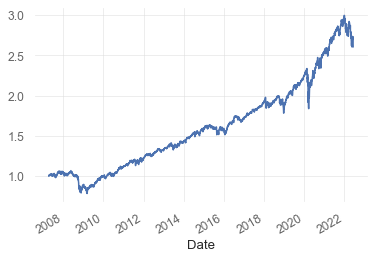

In [23]:
ew_index_base_cero.plot()

Me permite este índice identificar cuáles son los sectores que suben o bajan? Veo dos cosas. La primera es que se identifica la correción del covid (y tiene sentido), o sea que parece que está bien calculado. Lo segundo es que tiene tendencia alcista, porque cuando uno o varios sectores caen, entiendo que el resto tira, pero no veo como sacar info de aquí

Y si hago un índice que vaya teniendo en cuenta los X sectores que más tiran por periodo? Se me ocurre que puedo hacer varios índices y sacar features de cada uno...
En primer lugar, cómo de estables es esa relación de TOP por periodos?

In [24]:
def seleccion_top_X(data, periodo, X):
    '''
       Devuelve df con los activos ordenados por volatildad
       cada día. El índice son fechas, las columnas el orden
       y los valores del DF son los ticker de los activos.

    '''
    data = data.resample(periodo).last()
    # Primero verifico que el df de datos está completo
    rent_activos = np.log(data).diff()
    rent_activos.iloc[0,:] = 0


    ranking = []
    for fila in range(rent_activos.shape[0]):
        ranking.append(rent_activos.iloc[fila, :X].sort_values(ascending=True).index)
        #print(ranking)
        #print("Hola")
        #ranking[fila] = ranking[fila].sort_values()

    ranking_df = pd.DataFrame(ranking, index=rent_activos.index)
    # ranking_df.sort_values(,ascending=True)

    return ranking_df

Esto es un ranking por rentabilidad

In [25]:
ranking = seleccion_top_X(closeyf,'2M', 5)
ranking

,0,1,2,3,4
Date,,,,,
2007-04-30,IEF,SHV,XLP,IEI,TLH
2007-06-30,TLH,IEF,IEI,XLP,SHV
2007-08-31,XLP,SHV,IEI,TLH,IEF
2007-10-31,SHV,IEF,IEI,TLH,XLP
2007-12-31,SHV,XLP,TLH,IEI,IEF
...,...,...,...,...,...
2021-10-31,IEF,TLH,IEI,XLP,SHV
2021-12-31,IEI,SHV,IEF,TLH,XLP
2022-02-28,TLH,XLP,IEF,IEI,SHV


Con esta idea, puedo aplicar distintos ratios (sharpe, jensen, rentabilida_máxima..) y buscar carteras. Estos activos, tendrían etiqueta 1 y el resto 0 en ese periodo.

Ahora tengo un problema. Con estos filtros, en el mismo periodo voy a tener distintas carteras TOP5 y la red no sabrá qué aprender. De momento voy calcular algunos.


Calculo la Beta

beta = cov(rent_i, rent_mercado)/var(rent_mercado)

In [26]:
def calcular_beta(data, indice, periodo):

    activos = data

    # Generamos las matrices de datos donde guardaremos los resultados.
    rent_activos=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)
    rent_indice=pd.DataFrame(np.zeros(len(indice)))

    # Calculamos la rentabilidad de los activos e índice.
    rent_activos = np.log(activos).diff()
    rent_indice = np.log(indice).diff()
    rent_activos.iloc[:1]=0
    rent_indice.iloc[0]=0 # Elimina el primer NaN sustituéndolo por 0

    # Calculamos la varianza del DAX
    varianza_indice = rent_indice.rolling(periodo).var()

    # Calculamos la covarianza del y activos
    cov_act_ind=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)

    # Recorro la matriz y calculo
    for activo in activos.columns:
        cov_act_ind.loc[:,activo] = rent_indice.rolling(periodo).cov(rent_activos.loc[:,activo])

    # Dataframe Beta
    beta=pd.DataFrame(np.zeros((cov_act_ind.shape[0] , cov_act_ind.shape[1])), index=cov_act_ind.index, columns=cov_act_ind.columns)

    # Sacamos la Beta del activo. β=cov(Rc,Rm)/σRm
    beta[periodo:beta.shape[0]] = cov_act_ind[periodo:rent_indice.shape[0]].div(varianza_indice[periodo:rent_indice.shape[0]], axis=0)

    return beta.iloc[periodo:,:]

In [27]:
beta = calcular_beta(closeyf, ew_index_base_cero, 40) # Tomo como reerncia 2M (40 días de tading)
beta.head()

,IEF,SHV,XLP,IEI,TLH,ICF,GLD,HYG,IYZ,SHY,XLE,TIP,TLT,XLI,XLU,XLK,XLV,XLB,XLY,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-08,0.211381,0.001088,0.944894,0.093587,0.280748,2.226651,1.226691,0.069836,1.589648,0.016848,1.959680,0.207313,0.441805,1.277776,1.833458,1.313523,1.068884,2.003622,1.526523,1.595626
2007-06-11,0.217326,0.001199,0.939588,0.096748,0.287895,2.197819,1.188393,0.077202,1.592886,0.018671,1.973456,0.216029,0.452125,1.291749,1.836941,1.323185,1.032490,2.015212,1.535692,1.594317
2007-06-12,0.274879,0.002719,0.976704,0.136038,0.371612,2.219901,1.114974,0.145557,1.598629,0.031657,1.962955,0.247888,0.544266,1.325321,1.836262,1.330853,0.966569,1.909372,1.433183,1.462851
2007-06-13,0.279541,-0.002186,0.928396,0.135891,0.422779,2.088225,1.086189,0.149649,1.497047,0.026910,1.956359,0.267131,0.626493,1.439057,1.853144,1.306008,0.940750,1.976136,1.389312,1.511190
2007-06-14,0.275967,-0.000806,0.928108,0.131615,0.410295,2.081533,1.074351,0.150475,1.501690,0.024573,1.999548,0.263025,0.606308,1.435784,1.849297,1.329049,0.942288,1.991041,1.403263,1.472021


Me puede interesar buscar o filtar los ETFs con Beta positiva máxima. Esto me va a indicar que activos se han movido más que el mercado. Si pienso en que busco los activos que "amplifican" el valor del mercado en la dirección del movimineto, debería estar obteniendo los valores que más tiran de mi índice sintético

Alfa de Jensen

alpha = (rentabilidad_cartera -fisk_free) - Beta*(rentabilidad_mercado - risk_free)

In [28]:
def calcular_alfa_jensen(data, indice, periodo):
    '''Supongo la rentabilidad del activo libre
    de riesgo '0'. POr eso no cosidero éste activo en
    el cálculo. Voy a calcular la alfa de cada activo
    sólo sobre el índice.
    '''
    # No Llamo a la función calcular Beta porque necesito las tripas
    activos = data

    # Generamos las matrices de datos donde guardaremos los resultados.
    rent_activos=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)
    alpha_activos=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)
    rent_indice=pd.DataFrame(np.zeros(len(indice)))

    # Calculamos la rentabilidad de los activos e índice.
    rent_activos = np.log(activos).diff()
    rent_indice = np.log(indice).diff()
    rent_activos.iloc[:1]=0
    rent_indice.iloc[0]=0 # Elimina el primer NaN sustituéndolo por 0

    # Calculamos la varianza del DAX
    varianza_indice = rent_indice.rolling(periodo).var()

    # Calculamos la covarianza del DAX y activos
    cov_act_ind=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)

    # Recorro la matriz y calculo
    for activo in activos.columns:
        cov_act_ind.loc[:,activo] = rent_indice.rolling(periodo).cov(rent_activos.loc[:,activo])

    # Dataframe Beta
    beta=pd.DataFrame(np.zeros((cov_act_ind.shape[0] , cov_act_ind.shape[1])), index=cov_act_ind.index, columns=cov_act_ind.columns)

    # Sacamos la Beta del activo. β=cov(Rc,Rm)/σRm
    beta[periodo:beta.shape[0]] = cov_act_ind[periodo:rent_indice.shape[0]].div(varianza_indice[periodo:rent_indice.shape[0]], axis=0)

    # Ahora calculo alfa:
    alpha=pd.DataFrame(np.zeros((cov_act_ind.shape[0] , cov_act_ind.shape[1])), index=cov_act_ind.index, columns=cov_act_ind.columns)
    Rfactivos=pd.DataFrame(np.ones((beta.shape[0] , beta.shape[1])), index=beta.index, columns=beta.columns)

     # Calculamos el Alpha del activo. α=Rc-(Rf+β(Rm-Rf))
    alpha[periodo:alpha.shape[0]] = (rent_activos[periodo:rent_activos.shape[0]] -
                                beta[periodo:beta.shape[0]].mul(rent_indice[periodo:rent_activos.shape[0]], axis=0)
                                )

    alpha=alpha[periodo:alpha.shape[0]]

    return alpha

In [29]:
alpha = calcular_alfa_jensen(closeyf, ew_index_base_cero, 40)
alpha

,IEF,SHV,XLP,IEI,TLH,ICF,GLD,HYG,IYZ,SHY,XLE,TIP,TLT,XLI,XLU,XLK,XLV,XLB,XLY,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-08,0.000744,0.000177,0.000822,-0.000497,-0.000871,-0.001878,-0.022584,-0.003057,0.007807,0.000287,-0.006284,0.000734,-0.003184,0.007017,-0.002590,0.006927,-0.002328,0.008342,0.004652,0.003140
2007-06-11,-0.002615,0.000091,0.005455,0.000203,-0.002689,-0.017289,0.007456,-0.002114,-0.001748,0.000126,0.007643,-0.002140,-0.002865,0.001303,0.013166,0.001981,0.000288,-0.008685,-0.003291,0.004570
2007-06-12,-0.004458,0.000118,0.000052,-0.002936,-0.007640,0.004219,0.001542,-0.003695,0.001670,-0.000570,0.006768,-0.003833,-0.009285,-0.000096,0.001418,0.001076,0.002136,0.006286,0.005780,0.000514
2007-06-13,0.000390,-0.000160,-0.001885,0.000229,0.003387,-0.009147,-0.004468,0.000202,-0.006478,-0.000025,-0.000316,0.000948,0.005397,0.008765,0.000698,-0.000738,-0.001547,0.002944,-0.002785,0.003284
2007-06-14,-0.000629,0.000734,-0.001510,-0.000825,-0.002869,-0.006638,-0.002342,0.000293,0.002270,-0.000078,0.010307,-0.000224,-0.004456,0.000522,0.000344,0.005163,-0.000223,0.001277,0.002602,-0.006292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-06,-0.007524,-0.000181,0.000757,-0.004014,-0.015565,-0.003451,-0.004368,-0.007359,0.002289,-0.001320,-0.000662,-0.006481,-0.018583,0.004589,0.004671,0.000732,0.000515,0.009870,0.010669,0.003308
2022-06-07,0.003688,-0.000020,-0.002649,0.001663,0.007762,0.002367,0.005384,-0.001559,-0.004316,0.000018,0.018932,0.001261,0.009835,0.004007,0.000523,-0.003064,0.004697,-0.003036,-0.018497,-0.002329
2022-06-08,-0.003341,-0.000067,-0.002310,-0.001529,-0.006480,-0.012475,0.000575,-0.003762,0.010764,-0.000580,0.014707,-0.001058,-0.007916,-0.006349,-0.012849,0.007033,0.002130,-0.007983,0.013912,-0.005020


Ratio Sharpe

Sharpe = (rent_i - risk_free)/sigma

In [30]:
def calcula_sharpe(data, periodo_ajuste=252):
    """Voy a calcular el ratio de sharpe con
    retorno log.
    Voy a considerar la rentabilidad del activo libre
    de riesgo igual a 0.

    Por defecto, voy a trabajar en ventana de 6 meses,
    pero dejo input para modificar este valor.
    """
    rent_activos = np.log(data).diff()
    volatilidad = rent_activos.std()
    # sharpe = rent_activos.iloc[ventana:] / volatilidad.iloc[ventana:]
    sharpe = np.sqrt(periodo_ajuste)*(rent_activos / volatilidad)
    sharpe.replace([np.inf, -np.inf], 0, inplace=True)

    return sharpe


In [31]:
sharpe = calcula_sharpe(closeyf, 252)
sharpe

,IEF,SHV,XLP,IEI,TLH,ICF,GLD,HYG,IYZ,SHY,XLE,TIP,TLT,XLI,XLU,XLK,XLV,XLB,XLY,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-13,-6.352028,13.120792,5.578866,-7.095102,-5.329049,10.874372,17.857828,-3.955006,5.052886,-9.369440,0.377147,-9.883799,-5.187077,-0.308139,-0.317389,0.919963,20.417030,2.329785,0.849401,3.228634
2007-04-16,4.083562,13.101541,3.708839,4.519110,8.878114,-1.958908,11.643435,-0.835165,11.109686,-2.335502,4.636146,12.647676,9.210112,8.904236,7.587218,9.159791,13.449018,13.353906,10.990535,18.460970
2007-04-17,15.846035,6.563908,15.366596,20.610567,11.115472,10.675422,-8.306915,-1.040263,-1.427492,30.392973,-4.510593,2.366050,9.349927,0.000000,5.974109,2.277659,4.323523,-9.483917,4.477075,-0.209660
2007-04-18,8.569449,45.829504,-4.288531,9.640261,7.805165,-4.381786,7.892637,0.624218,2.853199,25.697816,-2.768843,12.991727,8.351598,3.053985,9.376874,-2.733780,-0.392172,-5.422303,-0.837751,8.758232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-06,-28.178745,-12.991775,0.681149,-26.013575,-39.479422,-2.919145,-6.250852,-16.354361,2.111717,-24.817890,-0.885622,-25.835470,-31.203858,4.643859,5.717263,0.078437,0.216804,9.464703,10.961890,2.195754
2022-06-07,15.030616,0.000000,8.830185,11.935856,21.496159,9.070630,9.202207,5.002574,6.311712,2.256278,23.313282,9.414246,18.005902,14.845871,7.755591,13.028184,18.210329,7.211656,-2.712434,5.897192
2022-06-08,-13.928797,-6.491816,-20.676525,-11.392727,-18.534904,-18.607351,-1.310982,-18.679497,-1.679765,-13.548638,1.718979,-9.750957,-14.918021,-20.304413,-25.509425,-12.478921,-11.178371,-21.092816,-6.522674,-13.609872


Por curiosidad hago un resample de 2 meses

In [32]:
test_sharpe =calcula_sharpe(closeyf, 252).resample('2M').last()
test_sharpe.head()

,IEF,SHV,XLP,IEI,TLH,ICF,GLD,HYG,IYZ,SHY,XLE,TIP,TLT,XLI,XLU,XLK,XLV,XLB,XLY,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-30,16.198600,13.089998,-6.107035,19.231817,13.578986,-5.903526,-9.887481,0.207464,-5.727900,13.981851,-9.445692,21.142812,17.466823,-13.071488,-4.949451,-8.515501,-4.671645,-18.566113,-14.059482,-5.984597
2007-06-30,19.415151,19.567632,1.860609,20.823533,21.045338,-5.223378,0.220266,-6.177803,-3.041211,37.455450,2.760716,23.254596,17.211727,3.994186,10.151120,-3.855725,-3.982076,6.223678,1.402299,-4.226963
2007-08-31,0.888511,-13.030056,4.368423,-1.902181,-1.999445,16.100386,15.413408,19.523181,8.623248,0.000000,10.392620,-1.559548,1.321405,16.763904,-2.672488,7.196102,6.563589,9.025911,17.899060,10.061681
2007-10-31,-25.147093,-6.523551,10.656041,-22.602729,-5.668864,11.862099,23.065610,13.636291,9.562106,-29.927813,21.039692,-18.815752,-15.205270,9.636770,14.987987,12.840803,8.629418,26.234074,3.311930,10.298018
2007-12-31,17.233166,-13.033829,-13.336120,19.649409,13.779559,6.785680,-9.244731,4.749085,-12.678949,29.668515,-10.119386,25.886857,10.120025,-5.098156,-17.869994,-8.211625,-5.175157,-6.008321,-4.035645,-0.265062


Cojo el top5 del primer periodo

In [33]:
test_sharpe.iloc[1, :].sort_values(ascending=False)

SHY    37.455450
TIP    23.254596
TLH    21.045338
IEI    20.823533
SHV    19.567632
IEF    19.415151
TLT    17.211727
XLU    10.151120
XLB     6.223678
XLI     3.994186
XLE     2.760716
XLP     1.860609
XLY     1.402299
GLD     0.220266
IYZ    -3.041211
XLK    -3.855725
XLV    -3.982076
XLF    -4.226963
ICF    -5.223378
HYG    -6.177803
Name: 2007-06-30 00:00:00, dtype: float64

Me parecen raros estos valores, voy a comprobar.

<AxesSubplot:xlabel='Date'>

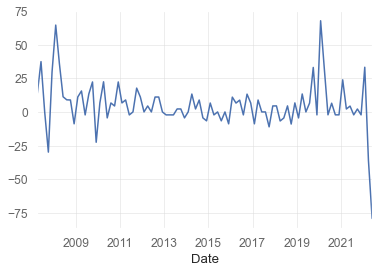

In [34]:
test_sharpe.loc[:, 'SHY'].plot()

<AxesSubplot:xlabel='Date'>

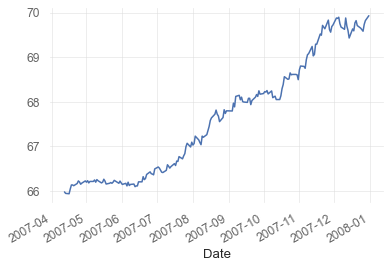

In [35]:
closeyf.loc[:'31-12-2007', 'SHY'].plot()

El cáclulo del ratio de sharpe está bien y viendo los datos tiene sentido...la varaición es muy baja con rentabilidad positiva. Quizá deberíamos contrastar los datos con otra fuente.

Comparo con la primera cartera que tenía por rentabilidad

In [36]:
ranking.iloc[1]

0    TLH
1    IEF
2    IEI
3    XLP
4    SHV
Name: 2007-06-30 00:00:00, dtype: object

Me hago una función que me ordene un df y me genere carteras seleccionando n_activos.

In [37]:
def seleccion_top_N(data, n_activos):
    ranking = []
    for fila in range(data.shape[0]):
        ranking.append(data.iloc[fila, :].sort_values(ascending=False).index)
        #print(ranking)
        #print("Hola")
        #ranking[fila] = ranking[fila].sort_values()

    ranking_df = pd.DataFrame(ranking, index=data.index)
    ranking_df = ranking_df.iloc[:, :5]
    # ranking_df.sort_values(,ascending=True)

    return ranking_df

Ahora voy a calcular ratios

Calculo la Beta

beta = cov(rent_i, rent_mercado)/var(rent_mercado)

In [38]:
def calcular_beta(data, indice, periodo):

    activos = data

    # Generamos las matrices de datos donde guardaremos los resultados.
    rent_activos=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)
    rent_indice=pd.DataFrame(np.zeros(len(indice)))

    # Calculamos la rentabilidad de los activos e índice.
    rent_activos = np.log(activos).diff()
    rent_indice = np.log(indice).diff()
    rent_activos.iloc[:1]=0
    rent_indice.iloc[0]=0 # Elimina el primer NaN sustituéndolo por 0

    # Calculamos la varianza del DAX
    varianza_indice = rent_indice.rolling(periodo).var()

    # Calculamos la covarianza del y activos
    cov_act_ind=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)

    # Recorro la matriz y calculo
    for activo in activos.columns:
        cov_act_ind.loc[:,activo] = rent_indice.rolling(periodo).cov(rent_activos.loc[:,activo])

    # Dataframe Beta
    beta=pd.DataFrame(np.zeros((cov_act_ind.shape[0] , cov_act_ind.shape[1])), index=cov_act_ind.index, columns=cov_act_ind.columns)

    # Sacamos la Beta del activo. β=cov(Rc,Rm)/σRm
    beta[periodo:beta.shape[0]] = cov_act_ind[periodo:rent_indice.shape[0]].div(varianza_indice[periodo:rent_indice.shape[0]], axis=0)

    return beta.iloc[periodo:,:]

In [39]:
beta = calcular_beta(closeyf, ew_index_base_cero, 40) # Tomo como reerncia 2M (40 días de trading)
beta

,IEF,SHV,XLP,IEI,TLH,ICF,GLD,HYG,IYZ,SHY,XLE,TIP,TLT,XLI,XLU,XLK,XLV,XLB,XLY,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-08,0.211381,0.001088,0.944894,0.093587,0.280748,2.226651,1.226691,0.069836,1.589648,0.016848,1.959680,0.207313,0.441805,1.277776,1.833458,1.313523,1.068884,2.003622,1.526523,1.595626
2007-06-11,0.217326,0.001199,0.939588,0.096748,0.287895,2.197819,1.188393,0.077202,1.592886,0.018671,1.973456,0.216029,0.452125,1.291749,1.836941,1.323185,1.032490,2.015212,1.535692,1.594317
2007-06-12,0.274879,0.002719,0.976704,0.136038,0.371612,2.219901,1.114974,0.145557,1.598629,0.031657,1.962955,0.247888,0.544266,1.325321,1.836262,1.330853,0.966569,1.909372,1.433183,1.462851
2007-06-13,0.279541,-0.002186,0.928396,0.135891,0.422779,2.088225,1.086189,0.149649,1.497047,0.026910,1.956359,0.267131,0.626493,1.439057,1.853144,1.306008,0.940750,1.976136,1.389312,1.511190
2007-06-14,0.275967,-0.000806,0.928108,0.131615,0.410295,2.081533,1.074351,0.150475,1.501690,0.024573,1.999548,0.263025,0.606308,1.435784,1.849297,1.329049,0.942288,1.991041,1.403263,1.472021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-06,0.034696,0.002501,0.996234,0.019757,0.075896,1.207178,0.129185,0.486709,1.240641,0.012796,1.293518,0.137945,0.094045,1.166187,0.687089,1.875542,1.023311,1.287368,2.037685,1.259613
2022-06-07,0.041542,0.002445,0.991948,0.022818,0.091166,1.212946,0.139474,0.484039,1.234341,0.012810,1.315010,0.140160,0.113646,1.171465,0.687324,1.869958,1.031949,1.279560,2.009357,1.255631
2022-06-08,0.038696,0.002426,1.009884,0.023363,0.084630,1.232964,0.151239,0.487594,1.232992,0.014407,1.263250,0.141696,0.099128,1.200700,0.696350,1.853031,1.014463,1.310156,1.998340,1.282719


In [40]:
beta_resample = beta.resample('2M').last()
beta_resample

,IEF,SHV,XLP,IEI,TLH,ICF,GLD,HYG,IYZ,SHY,XLE,TIP,TLT,XLI,XLU,XLK,XLV,XLB,XLY,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-30,0.309673,-0.000554,0.816943,0.161720,0.470026,2.132038,0.919117,0.192259,1.385601,0.047015,2.145683,0.307596,0.685657,1.330215,2.061729,1.266884,1.016434,1.875755,1.197919,1.523487
2007-08-31,-0.344889,-0.018860,1.066271,-0.290383,-0.350032,2.265595,0.424855,0.548273,1.731017,-0.133404,2.301933,-0.231746,-0.362646,1.873064,2.025009,1.598842,1.276160,2.349702,1.996863,2.381969
2007-10-31,-0.271371,-0.008680,0.793630,-0.109848,-0.161688,2.203475,0.622392,0.706351,1.434191,-0.059621,2.519222,-0.087188,-0.347125,1.824581,1.417361,1.413628,1.198912,2.629582,1.890726,2.350527
2007-12-31,-0.472904,-0.022735,0.963739,-0.380385,-0.534626,2.752557,0.979898,0.076076,2.372546,-0.169999,2.937232,-0.489398,-0.613351,1.847493,1.018011,1.843916,1.199295,2.772799,1.767895,2.939296
2008-02-29,-0.295055,-0.014492,1.026005,-0.205479,-0.261882,3.015787,0.156441,0.087059,2.326259,-0.095755,2.603637,-0.145155,-0.250527,1.825009,1.697219,1.846277,0.953559,2.434309,2.146160,3.265934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,0.068492,0.001500,0.966254,0.028260,0.163769,1.174528,0.119178,0.319803,1.246921,0.006645,1.429352,0.090886,0.244343,1.504188,0.995046,1.761265,1.216597,1.577145,1.362981,1.611390
2021-12-31,-0.236451,0.002993,0.757433,-0.114622,-0.328955,1.373658,0.253753,0.444535,0.960686,-0.018399,1.915874,0.094214,-0.528275,1.587559,0.842433,2.094104,0.713918,1.303967,1.889120,1.471708
2022-02-28,0.129442,0.004503,0.536451,0.105173,0.131502,1.264004,-0.005829,0.405949,1.506408,0.054823,0.379712,0.153906,0.129001,1.211188,0.801763,2.099869,1.039041,1.274584,2.018545,1.135016


In [41]:
cartera_beta = seleccion_top_N(beta_resample, 5)
cartera_beta

,0,1,2,3,4
Date,,,,,
2007-06-30,XLE,ICF,XLU,XLB,XLF
2007-08-31,XLF,XLB,XLE,ICF,XLU
2007-10-31,XLB,XLE,XLF,ICF,XLY
2007-12-31,XLF,XLE,XLB,ICF,IYZ
2008-02-29,XLF,ICF,XLE,XLB,IYZ
...,...,...,...,...,...
2021-10-31,XLK,XLF,XLB,XLI,XLE
2021-12-31,XLK,XLE,XLY,XLI,XLF
2022-02-28,XLK,XLY,IYZ,XLB,ICF


Me puede interesar buscar o filtar los ETFs con Beta positiva máxima. Esto me va a indicar que activos se han movido más que el mercado. Si pienso en que busco los activos que "amplifican" el valor del mercado en la dirección del movimineto, debería estar obteniendo los valores que más tiran de mi índice sintético

Alfa de Jensen

alpha = (rentabilidad_cartera -fisk_free) - Beta*(rentabilidad_mercado - risk_free)

In [42]:
def calcular_alfa_jensen(data, indice, periodo):
    '''Supongo la rentabilidad del activo libre
    de riesgo '0'. POr eso no cosidero éste activo en
    el cálculo. Voy a calcular la alfa de cada activo
    sólo sobre el índice.
    '''
    # No Llamo a la función calcular Beta porque necesito las tripas
    activos = data

    # Generamos las matrices de datos donde guardaremos los resultados.
    rent_activos=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)
    alpha_activos=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)
    rent_indice=pd.DataFrame(np.zeros(len(indice)))

    # Calculamos la rentabilidad de los activos e índice.
    rent_activos = np.log(activos).diff()
    rent_indice = np.log(indice).diff()
    rent_activos.iloc[:1]=0
    rent_indice.iloc[0]=0 # Elimina el primer NaN sustituéndolo por 0

    # Calculamos la varianza del DAX
    varianza_indice = rent_indice.rolling(periodo).var()

    # Calculamos la covarianza del DAX y activos
    cov_act_ind=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)

    # Recorro la matriz y calculo
    for activo in activos.columns:
        cov_act_ind.loc[:,activo] = rent_indice.rolling(periodo).cov(rent_activos.loc[:,activo])

    # Dataframe Beta
    beta=pd.DataFrame(np.zeros((cov_act_ind.shape[0] , cov_act_ind.shape[1])), index=cov_act_ind.index, columns=cov_act_ind.columns)

    # Sacamos la Beta del activo. β=cov(Rc,Rm)/σRm
    beta[periodo:beta.shape[0]] = cov_act_ind[periodo:rent_indice.shape[0]].div(varianza_indice[periodo:rent_indice.shape[0]], axis=0)

    # Ahora calculo alfa:
    alpha=pd.DataFrame(np.zeros((cov_act_ind.shape[0] , cov_act_ind.shape[1])), index=cov_act_ind.index, columns=cov_act_ind.columns)
    Rfactivos=pd.DataFrame(np.ones((beta.shape[0] , beta.shape[1])), index=beta.index, columns=beta.columns)

     # Calculamos el Alpha del activo. α=Rc-(Rf+β(Rm-Rf))
    alpha[periodo:alpha.shape[0]] = (rent_activos[periodo:rent_activos.shape[0]] -
                                beta[periodo:beta.shape[0]].mul(rent_indice[periodo:rent_activos.shape[0]], axis=0)
                                )

    alpha=alpha[periodo:alpha.shape[0]]

    return alpha

In [43]:
alpha = calcular_alfa_jensen(closeyf, ew_index_base_cero, 40)
alpha

,IEF,SHV,XLP,IEI,TLH,ICF,GLD,HYG,IYZ,SHY,XLE,TIP,TLT,XLI,XLU,XLK,XLV,XLB,XLY,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-08,0.000744,0.000177,0.000822,-0.000497,-0.000871,-0.001878,-0.022584,-0.003057,0.007807,0.000287,-0.006284,0.000734,-0.003184,0.007017,-0.002590,0.006927,-0.002328,0.008342,0.004652,0.003140
2007-06-11,-0.002615,0.000091,0.005455,0.000203,-0.002689,-0.017289,0.007456,-0.002114,-0.001748,0.000126,0.007643,-0.002140,-0.002865,0.001303,0.013166,0.001981,0.000288,-0.008685,-0.003291,0.004570
2007-06-12,-0.004458,0.000118,0.000052,-0.002936,-0.007640,0.004219,0.001542,-0.003695,0.001670,-0.000570,0.006768,-0.003833,-0.009285,-0.000096,0.001418,0.001076,0.002136,0.006286,0.005780,0.000514
2007-06-13,0.000390,-0.000160,-0.001885,0.000229,0.003387,-0.009147,-0.004468,0.000202,-0.006478,-0.000025,-0.000316,0.000948,0.005397,0.008765,0.000698,-0.000738,-0.001547,0.002944,-0.002785,0.003284
2007-06-14,-0.000629,0.000734,-0.001510,-0.000825,-0.002869,-0.006638,-0.002342,0.000293,0.002270,-0.000078,0.010307,-0.000224,-0.004456,0.000522,0.000344,0.005163,-0.000223,0.001277,0.002602,-0.006292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-06,-0.007524,-0.000181,0.000757,-0.004014,-0.015565,-0.003451,-0.004368,-0.007359,0.002289,-0.001320,-0.000662,-0.006481,-0.018583,0.004589,0.004671,0.000732,0.000515,0.009870,0.010669,0.003308
2022-06-07,0.003688,-0.000020,-0.002649,0.001663,0.007762,0.002367,0.005384,-0.001559,-0.004316,0.000018,0.018932,0.001261,0.009835,0.004007,0.000523,-0.003064,0.004697,-0.003036,-0.018497,-0.002329
2022-06-08,-0.003341,-0.000067,-0.002310,-0.001529,-0.006480,-0.012475,0.000575,-0.003762,0.010764,-0.000580,0.014707,-0.001058,-0.007916,-0.006349,-0.012849,0.007033,0.002130,-0.007983,0.013912,-0.005020


In [44]:
alpha_resample = alpha.resample('2M').last()
alpha_resample

,IEF,SHV,XLP,IEI,TLH,ICF,GLD,HYG,IYZ,SHY,XLE,TIP,TLT,XLI,XLU,XLK,XLV,XLB,XLY,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-30,0.004657,2.744143e-04,-0.000301,0.002939,0.007499,-0.010620,-0.001432,-0.003177,-0.005060,0.001917,-0.000222,0.005346,0.009084,0.001295,0.004302,-0.005698,-0.004584,0.002952,-0.000796,-0.008145
2007-08-31,0.002380,-6.494019e-05,-0.004018,0.001510,0.001385,0.007309,0.008244,0.005584,-0.003192,0.000829,-0.001182,0.001045,0.003041,0.003445,-0.014649,-0.003382,-0.003266,-0.005616,0.003843,-0.001674
2007-10-31,-0.004865,-3.166183e-05,0.000915,-0.002741,-0.001130,0.000648,0.012019,0.001437,-0.001448,-0.001188,0.009285,-0.004158,-0.006692,-0.003839,0.001893,0.001996,-0.002091,0.008074,-0.009955,-0.002683
2007-12-31,0.003555,-2.328040e-04,-0.005807,0.002190,0.004251,0.015145,-0.004344,0.002356,-0.005830,0.001204,-0.006228,0.005452,0.004671,-0.000470,-0.011574,-0.003366,-0.001003,0.000200,0.000276,0.006203
2008-02-29,0.007671,3.566250e-05,-0.008684,0.006243,0.010299,0.008508,0.003548,-0.002957,-0.008736,0.002489,-0.007602,0.008998,0.012669,-0.009425,-0.012820,-0.002017,-0.004353,-0.008293,-0.003674,-0.000336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,0.000444,-1.808398e-04,-0.000868,-0.000152,0.001035,-0.010605,-0.008530,-0.002604,-0.007059,0.000117,-0.006421,-0.002551,0.003081,0.000465,-0.005843,0.004489,0.009830,-0.004619,0.002749,-0.003776
2021-12-31,-0.001101,-3.627768e-07,0.006675,-0.000297,0.002199,0.003125,0.006778,-0.000284,-0.006779,-0.000115,0.002293,-0.001249,0.002023,0.004069,0.003397,-0.005131,-0.004336,0.004266,-0.002623,-0.001969
2022-02-28,0.011084,-9.827593e-05,-0.014296,0.006185,0.019190,-0.020292,0.010322,0.000035,-0.009487,0.001683,0.023743,0.016951,0.021465,0.005601,0.003818,-0.005346,-0.009336,-0.013591,0.003620,-0.016853


Calculo las carteras con alpha de jensen

In [45]:
cartera_alpha = seleccion_top_N(alpha_resample, 5)

Ratio Sharpe

Sharpe = (rent_i - risk_free)/sigma

In [46]:
def calcula_sharpe(data, periodo_ajuste=252):
    """Voy a calcular el ratio de sharpe con
    retorno log.
    Voy a considerar la rentabilidad del activo libre
    de riesgo igual a 0.

    Por defecto, voy a trabajar en ventana de 6 meses,
    pero dejo input para modificar este valor.
    """
    rent_activos = np.log(data).diff()
    volatilidad = rent_activos.std()
    # sharpe = rent_activos.iloc[ventana:] / volatilidad.iloc[ventana:]
    sharpe = np.sqrt(periodo_ajuste)*(rent_activos / volatilidad)
    sharpe.replace([np.inf, -np.inf], 0, inplace=True)

    return sharpe


In [47]:
sharpe = calcula_sharpe(closeyf, 252)
sharpe.head()

,IEF,SHV,XLP,IEI,TLH,ICF,GLD,HYG,IYZ,SHY,XLE,TIP,TLT,XLI,XLU,XLK,XLV,XLB,XLY,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-13,-6.352028,13.120792,5.578866,-7.095102,-5.329049,10.874372,17.857828,-3.955006,5.052886,-9.369440,0.377147,-9.883799,-5.187077,-0.308139,-0.317389,0.919963,20.417030,2.329785,0.849401,3.228634
2007-04-16,4.083562,13.101541,3.708839,4.519110,8.878114,-1.958908,11.643435,-0.835165,11.109686,-2.335502,4.636146,12.647676,9.210112,8.904236,7.587218,9.159791,13.449018,13.353906,10.990535,18.460970
2007-04-17,15.846035,6.563908,15.366596,20.610567,11.115472,10.675422,-8.306915,-1.040263,-1.427492,30.392973,-4.510593,2.366050,9.349927,0.000000,5.974109,2.277659,4.323523,-9.483917,4.477075,-0.209660
2007-04-18,8.569449,45.829504,-4.288531,9.640261,7.805165,-4.381786,7.892637,0.624218,2.853199,25.697816,-2.768843,12.991727,8.351598,3.053985,9.376874,-2.733780,-0.392172,-5.422303,-0.837751,8.758232


Por curiosidad hago un resample de 2 meses

In [48]:
sharpe_resample = calcula_sharpe(closeyf, 252).resample('2M').last()
sharpe_resample.head()

,IEF,SHV,XLP,IEI,TLH,ICF,GLD,HYG,IYZ,SHY,XLE,TIP,TLT,XLI,XLU,XLK,XLV,XLB,XLY,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-30,16.198600,13.089998,-6.107035,19.231817,13.578986,-5.903526,-9.887481,0.207464,-5.727900,13.981851,-9.445692,21.142812,17.466823,-13.071488,-4.949451,-8.515501,-4.671645,-18.566113,-14.059482,-5.984597
2007-06-30,19.415151,19.567632,1.860609,20.823533,21.045338,-5.223378,0.220266,-6.177803,-3.041211,37.455450,2.760716,23.254596,17.211727,3.994186,10.151120,-3.855725,-3.982076,6.223678,1.402299,-4.226963
2007-08-31,0.888511,-13.030056,4.368423,-1.902181,-1.999445,16.100386,15.413408,19.523181,8.623248,0.000000,10.392620,-1.559548,1.321405,16.763904,-2.672488,7.196102,6.563589,9.025911,17.899060,10.061681
2007-10-31,-25.147093,-6.523551,10.656041,-22.602729,-5.668864,11.862099,23.065610,13.636291,9.562106,-29.927813,21.039692,-18.815752,-15.205270,9.636770,14.987987,12.840803,8.629418,26.234074,3.311930,10.298018
2007-12-31,17.233166,-13.033829,-13.336120,19.649409,13.779559,6.785680,-9.244731,4.749085,-12.678949,29.668515,-10.119386,25.886857,10.120025,-5.098156,-17.869994,-8.211625,-5.175157,-6.008321,-4.035645,-0.265062


Tengo que eliminar la primera fila para que me cuadren las fechas

In [49]:
sharpe_resample = sharpe_resample.iloc[1:, :]
sharpe_resample

,IEF,SHV,XLP,IEI,TLH,ICF,GLD,HYG,IYZ,SHY,XLE,TIP,TLT,XLI,XLU,XLK,XLV,XLB,XLY,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-30,19.415151,19.567632,1.860609,20.823533,21.045338,-5.223378,0.220266,-6.177803,-3.041211,37.455450,2.760716,23.254596,17.211727,3.994186,10.151120,-3.855725,-3.982076,6.223678,1.402299,-4.226963
2007-08-31,0.888511,-13.030056,4.368423,-1.902181,-1.999445,16.100386,15.413408,19.523181,8.623248,0.000000,10.392620,-1.559548,1.321405,16.763904,-2.672488,7.196102,6.563589,9.025911,17.899060,10.061681
2007-10-31,-25.147093,-6.523551,10.656041,-22.602729,-5.668864,11.862099,23.065610,13.636291,9.562106,-29.927813,21.039692,-18.815752,-15.205270,9.636770,14.987987,12.840803,8.629418,26.234074,3.311930,10.298018
2007-12-31,17.233166,-13.033829,-13.336120,19.649409,13.779559,6.785680,-9.244731,4.749085,-12.678949,29.668515,-10.119386,25.886857,10.120025,-5.098156,-17.869994,-8.211625,-5.175157,-6.008321,-4.035645,-0.265062
2008-02-29,39.760846,12.963543,-31.829077,53.736399,32.736017,-16.393154,2.800690,-8.320867,-36.602627,64.660285,-26.734764,41.367075,25.452614,-30.846883,-38.549008,-22.583289,-19.611305,-32.901477,-27.785997,-25.400055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,1.631222,-12.952933,-1.646372,-1.002987,2.571214,-8.089738,-12.101458,-5.738152,-8.219382,2.182274,-5.221457,-10.135265,5.115311,0.319175,-7.694556,4.703337,13.640373,-4.829576,2.851501,-3.041085
2021-12-31,-4.224580,0.000000,11.343937,-2.011129,5.466077,2.478403,9.642811,-0.498961,-7.598990,-2.191260,2.001069,-4.897247,3.283435,4.737712,4.516783,-5.358082,-5.984193,4.446843,-2.637263,-1.373239
2022-02-28,42.258488,-6.490522,-22.455797,41.156389,49.151143,-13.679518,14.605079,1.558203,-7.932061,33.272296,19.316844,68.093127,36.343569,8.490150,6.668763,-1.994973,-10.686137,-11.506132,7.726184,-11.458753


Calulo el top_5

In [50]:
cartera_sharpe = seleccion_top_N(sharpe_resample, 5)
cartera_sharpe

,0,1,2,3,4
Date,,,,,
2007-06-30,SHY,TIP,TLH,IEI,SHV
2007-08-31,HYG,XLY,XLI,ICF,GLD
2007-10-31,XLB,GLD,XLE,XLU,HYG
2007-12-31,SHY,TIP,IEI,IEF,TLH
2008-02-29,SHY,IEI,TIP,IEF,TLH
...,...,...,...,...,...
2021-10-31,XLV,TLT,XLK,XLY,TLH
2021-12-31,XLP,GLD,TLH,XLI,XLU
2022-02-28,TIP,TLH,IEF,IEI,TLT


Comparo con la primera cartera que tenía por rentabilidad

In [51]:
ranking.iloc[1]

0    TLH
1    IEF
2    IEI
3    XLP
4    SHV
Name: 2007-06-30 00:00:00, dtype: object

Idea. Puedo construir carteras y asigna peso a cada ETF por cada cartera en la que aparezac. Puedo equiponderar y asignar peso/num_carteras

Cuántas carteras hago?
- Jensen
- Sharpe
- Beta
- Momentum
- Media_Movil_Close>Indice equiponderado--> Selecciono los 5 que más se separen porcentualmente de la media.

Qué etiquetas tiene la red?

Momentum

In [52]:

from pandas import Timestamp

def calculate_momentum(data):
    '''Esta función calcula el momentum para un sólo activo.
    En caso de querer aplicarla a un DF, los datos
    deben ser introducidos en bucle for o usada en
    en apply()
    '''
    # Calculo el log de los datos para transformar el dataset. Son precios de cierre en escala log
    # Con esto convierto el problema de la regresión exponencial en lineal.
    # REcuerda que usamos reg exponencial porque viene epresada en %, mientras que la reg lineal, lo están en $
    log_data = np.log(data)

    # Horizontal values
    # Piensa que esto es
    x_data = np.arange(len(log_data))

    # De la regresión, sólo me interesan la pendiente y la precisión:
    beta, _, rvalue, _, _ = linregress(x_data, log_data)

    # Anualizamos la pendiente. Esto tengo que valorarlo en función de cómo quiero que
    # evolucione mi algoritmo. Creo que no me interesa anualizar y trabajar en ventana rodante
    # Si no anualizamos, calcularemos el porcentaje de movimiento por día.
    # Y multiplicamos por la precisión del modelo
    # Al mulitplicar por r2, está filtrando acciones con momentum alto pero mal ajustados
    # R2 = 1 - RSS/TSS
    return  (1+beta)**252*(rvalue**2)

Ahora tengo que calcular el momentum de cada ETF.

In [53]:
def filtro_momentum(data, periodo_momentum, resampling='2M'):
    """Este filtro se basa en una condición de momento positvo
    en ventana rodante.

    La función tiene que ser capaz de calcular el rolling
    sharpe porque puede ser usada como filtor de una estrategia
    que no realiza este cálculo

    Inputs: data, periodo de resampling

    Devuelve un DF con la condición True/False
    """
    # Calculo momentum
    momentum = pd.DataFrame(columns = data.columns)

    for stock in data.columns:
        # Voy a recorrer la lista de acciones para calcular su ventana rodante
        # y sobre ese dato, calculo el momento usando apply. PIensa que lo que estás haciend
        # es calcular la regresión exponencial cada X días
        momentum[stock] = data[stock].rolling(periodo_momentum).apply(calculate_momentum, raw=False)

    momentum = momentum.resample('{}'.format(resampling)).last()

    return momentum

In [54]:
momentum = filtro_momentum(closeyf, 252, '2M').dropna(axis=0)
momentum

,IEF,SHV,XLP,IEI,TLH,ICF,GLD,HYG,IYZ,SHY,XLE,TIP,TLT,XLI,XLU,XLK,XLV,XLB,XLY,XLF
Date,,,,,,,,,,,,,,,,,,,,
2008-04-30,1.110707,1.044139,0.301538,1.109103,1.053578,0.379495,1.422601,0.005881,0.529020,1.072448,0.595733,1.121585,1.005307,0.150747,0.001796,0.264057,0.404696,0.169783,0.644783,0.581926
2008-06-30,0.908177,0.999096,0.218390,0.899662,0.815253,0.120756,1.151672,0.047360,0.505068,0.929558,0.725511,1.029274,0.713292,0.277748,0.065981,0.308673,0.495135,0.369920,0.571883,0.561821
2008-08-31,0.672063,0.959989,0.019643,0.664669,0.566427,0.151197,0.524573,0.259054,0.487211,0.774219,0.218193,0.874478,0.421460,0.456221,0.082288,0.409694,0.498761,0.017157,0.534127,0.521219
2008-10-31,0.485443,0.964613,0.137019,0.567254,0.347621,0.150298,0.015351,0.317999,0.397418,0.739391,0.128358,0.043124,0.382262,0.367633,0.383555,0.386536,0.466259,0.209571,0.374532,0.454955
2008-12-31,0.457109,0.986052,0.337984,0.584560,0.391585,0.255650,0.393967,0.426782,0.384330,0.740122,0.296376,0.259368,0.512775,0.388247,0.444888,0.381919,0.475475,0.317273,0.384574,0.343999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,0.182219,0.757083,0.861668,0.318897,0.124574,1.319679,0.178921,0.908268,0.832395,0.174131,1.036176,0.847209,0.084541,0.954980,0.645001,1.206444,1.112250,0.893675,1.028997,1.293394
2021-12-31,0.000399,0.864796,0.927121,0.328004,0.075854,1.277113,0.013043,0.792512,0.252449,0.558064,0.786432,0.915263,0.190744,0.721851,0.805274,1.234905,1.037634,0.757973,1.018417,1.040579
2022-02-28,0.013216,0.779596,0.924160,0.431487,0.118529,0.852902,0.112162,0.092709,0.079107,0.617547,0.840256,0.600643,0.255052,0.218773,0.676239,0.952519,0.766719,0.416780,0.634197,0.893721


El problema es que me como un año de histórico...Hay que valorarlo

In [55]:
cartera_momentum = seleccion_top_N(momentum, 5)
cartera_momentum

,0,1,2,3,4
Date,,,,,
2008-04-30,GLD,TIP,IEF,IEI,SHY
2008-06-30,GLD,TIP,SHV,SHY,IEF
2008-08-31,SHV,TIP,SHY,IEF,IEI
2008-10-31,SHV,SHY,IEI,IEF,XLV
2008-12-31,SHV,SHY,IEI,TLT,XLV
...,...,...,...,...,...
2021-10-31,ICF,XLF,XLK,XLV,XLE
2021-12-31,ICF,XLK,XLF,XLV,XLY
2022-02-28,XLK,XLP,XLF,ICF,XLE


Media móvil. Pongo por defecto un periodo de 252, que es un año de trading y parece un periodo macro razonable. Otra alternativa sería fijar 40 ó 60 días en función de lo que acordemos como marco de referencia y comparar.

In [56]:
def filtro_SMA(data, indice, periodo=252, resampling='2M'):
    """Este filtro se basa en una media móvil simple
    sobre le precio de cierre.

    La función tiene que ser capaz de calcular el rolling
    sharpe porque puede ser usada como filtor de una estrategia
    que no realiza este cálculo

    Inputs: data con precios de cierre, índice con precios de cierre
            periodo_sma y periodo de resampling

    Devuelve un DF con la condición True/False
    """
    # Calculo SMA del dataframe de datos
    sma_data = data.rolling(periodo).mean().resample(resampling).last().dropna(axis=0)
    # Ahora mi índice
    sma_index = indice.rolling(252).mean().resample('2M').last().dropna(axis=0)


    sma_distance = sma_data.sub(sma_index, axis=0)

    # return
    return sma_distance

Cómo calculo la distancia a la media del índice:
- Calculo media móvil del precio de cada ETF.
- Calculo media móvil de mi índice sintético.
- Resto mm_etf - mm_índice.
- Ordeno y cojo los 5 que más se separan. No voy a exigir que la dif sea positiva, no quiero los que sean positivos, sino los que mejor se hayan comportado sobre la media; habrá periodos en los que alguno de los top5 sea negativo? O exigo que sea positivo y genero cartera con num_activos <= 5. Esto también tendría sentido si lo que voy a asignar es un peso positivo en cartera a los activos top.

Voy a descojonar el cálculo a ver qué estoy haciendo...

In [57]:
# Calculo un df con la media móvil de los precios de cierre
sma_data = closeyf.rolling(252).mean().resample('2M').last().dropna(axis=0)
sma_data

,IEF,SHV,XLP,IEI,TLH,ICF,GLD,HYG,IYZ,SHY,XLE,TIP,TLT,XLI,XLU,XLK,XLV,XLB,XLY,XLF
Date,,,,,,,,,,,,,,,,,,,,
2008-04-30,61.778190,100.018125,18.773581,81.888412,71.021182,26.392587,77.556270,39.998627,19.901512,68.929406,47.528089,69.591934,59.541680,28.719352,23.913329,20.272926,26.819943,29.662396,28.720947,19.170911
2008-06-30,62.959213,100.735810,18.901334,83.300725,72.228082,25.849838,81.268016,40.029271,19.105620,69.752050,49.630926,71.142614,60.558224,28.671855,24.017867,20.189368,26.262710,30.224280,27.714045,17.936824
2008-08-31,64.177811,101.385019,19.041127,84.705566,73.518628,25.400175,84.982301,40.066649,18.027872,70.531024,50.422403,72.756067,61.686195,28.116435,24.029858,19.789840,25.997603,30.255693,26.563145,16.575352
2008-10-31,65.299558,101.980424,18.934438,86.161076,74.687887,24.112960,86.269682,38.965150,16.456829,71.324809,48.590923,73.470727,62.940838,26.670684,23.229504,18.657545,25.199945,29.039676,25.077945,14.958403
2008-12-31,66.700253,102.466173,18.414489,87.805474,76.315310,22.102624,85.985198,37.243529,15.030654,72.068930,45.672907,73.265792,65.103966,24.721312,21.971935,17.185300,23.959025,26.923774,23.330728,13.261357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,115.199808,110.391570,67.135239,130.095380,146.711429,59.886696,169.363690,83.114068,31.335988,85.896930,45.700999,119.570077,144.012083,95.871508,62.751022,139.151243,120.027986,77.991548,171.218942,33.864863
2021-12-31,114.543520,110.376542,68.586655,129.595111,145.263645,63.203389,168.311230,83.769087,31.891675,85.819108,49.267595,120.853574,142.852996,99.134428,63.916723,147.107221,124.418974,81.204194,179.652895,35.899429
2022-02-28,113.775401,110.347761,70.453575,128.844212,144.055240,65.635536,168.245635,83.876161,31.956360,85.622094,52.962298,121.416266,141.847923,101.264663,65.143689,151.427236,127.125389,83.146644,182.814937,37.316411


In [58]:
# Ahora mi índice
sma_index = ew_index_base_cero.rolling(252).mean().resample('2M').last().dropna(axis=0)
sma_index

Date
2008-04-30    1.028861
2008-06-30    1.033107
2008-08-31    1.032524
2008-10-31    1.011873
2008-12-31    0.980847
                ...   
2021-10-31    2.668960
2021-12-31    2.743476
2022-02-28    2.789417
2022-04-30    2.825826
2022-06-30    2.821995
Freq: 2M, Length: 86, dtype: float64

In [59]:
dif = sma_data.sub(sma_index, axis=0)
dif

,IEF,SHV,XLP,IEI,TLH,ICF,GLD,HYG,IYZ,SHY,XLE,TIP,TLT,XLI,XLU,XLK,XLV,XLB,XLY,XLF
Date,,,,,,,,,,,,,,,,,,,,
2008-04-30,60.749329,98.989264,17.744720,80.859551,69.992321,25.363726,76.527408,38.969765,18.872651,67.900545,46.499228,68.563073,58.512819,27.690491,22.884467,19.244065,25.791081,28.633535,27.692086,18.142050
2008-06-30,61.926106,99.702703,17.868227,82.267617,71.194975,24.816730,80.234908,38.996163,18.072513,68.718943,48.597818,70.109507,59.525117,27.638748,22.984760,19.156260,25.229602,29.191173,26.680938,16.903717
2008-08-31,63.145287,100.352495,18.008603,83.673042,72.486104,24.367651,83.949777,39.034125,16.995348,69.498500,49.389879,71.723543,60.653671,27.083911,22.997334,18.757316,24.965079,29.223170,25.530622,15.542828
2008-10-31,64.287684,100.968551,17.922564,85.149203,73.676014,23.101087,85.257809,37.953277,15.444955,70.312935,47.579049,72.458854,61.928964,25.658811,22.217630,17.645672,24.188072,28.027803,24.066072,13.946529
2008-12-31,65.719406,101.485325,17.433642,86.824627,75.334463,21.121777,85.004351,36.262682,14.049807,71.088082,44.692059,72.284944,64.123118,23.740465,20.991088,16.204453,22.978178,25.942927,22.349880,12.280509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,112.530848,107.722610,64.466280,127.426420,144.042469,57.217736,166.694731,80.445109,28.667028,83.227970,43.032039,116.901117,141.343123,93.202549,60.082063,136.482283,117.359026,75.322589,168.549982,31.195903
2021-12-31,111.800044,107.633067,65.843180,126.851635,142.520170,60.459913,165.567754,81.025611,29.148199,83.075632,46.524120,118.110098,140.109521,96.390953,61.173247,144.363745,121.675498,78.460719,176.909419,33.155954
2022-02-28,110.985984,107.558344,67.664158,126.054795,141.265823,62.846119,165.456218,81.086744,29.166943,82.832676,50.172881,118.626849,139.058506,98.475246,62.354272,148.637819,124.335972,80.357227,180.025520,34.526994


In [60]:
media = filtro_SMA(closeyf, ew_index_base_cero, 252, '2M')
media

,IEF,SHV,XLP,IEI,TLH,ICF,GLD,HYG,IYZ,SHY,XLE,TIP,TLT,XLI,XLU,XLK,XLV,XLB,XLY,XLF
Date,,,,,,,,,,,,,,,,,,,,
2008-04-30,60.749329,98.989264,17.744720,80.859551,69.992321,25.363726,76.527408,38.969765,18.872651,67.900545,46.499228,68.563073,58.512819,27.690491,22.884467,19.244065,25.791081,28.633535,27.692086,18.142050
2008-06-30,61.926106,99.702703,17.868227,82.267617,71.194975,24.816730,80.234908,38.996163,18.072513,68.718943,48.597818,70.109507,59.525117,27.638748,22.984760,19.156260,25.229602,29.191173,26.680938,16.903717
2008-08-31,63.145287,100.352495,18.008603,83.673042,72.486104,24.367651,83.949777,39.034125,16.995348,69.498500,49.389879,71.723543,60.653671,27.083911,22.997334,18.757316,24.965079,29.223170,25.530622,15.542828
2008-10-31,64.287684,100.968551,17.922564,85.149203,73.676014,23.101087,85.257809,37.953277,15.444955,70.312935,47.579049,72.458854,61.928964,25.658811,22.217630,17.645672,24.188072,28.027803,24.066072,13.946529
2008-12-31,65.719406,101.485325,17.433642,86.824627,75.334463,21.121777,85.004351,36.262682,14.049807,71.088082,44.692059,72.284944,64.123118,23.740465,20.991088,16.204453,22.978178,25.942927,22.349880,12.280509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,112.530848,107.722610,64.466280,127.426420,144.042469,57.217736,166.694731,80.445109,28.667028,83.227970,43.032039,116.901117,141.343123,93.202549,60.082063,136.482283,117.359026,75.322589,168.549982,31.195903
2021-12-31,111.800044,107.633067,65.843180,126.851635,142.520170,60.459913,165.567754,81.025611,29.148199,83.075632,46.524120,118.110098,140.109521,96.390953,61.173247,144.363745,121.675498,78.460719,176.909419,33.155954
2022-02-28,110.985984,107.558344,67.664158,126.054795,141.265823,62.846119,165.456218,81.086744,29.166943,82.832676,50.172881,118.626849,139.058506,98.475246,62.354272,148.637819,124.335972,80.357227,180.025520,34.526994


In [61]:
cartera_media = seleccion_top_N(media, 5)
cartera_media

,0,1,2,3,4
Date,,,,,
2008-04-30,SHV,IEI,GLD,TLH,TIP
2008-06-30,SHV,IEI,GLD,TLH,TIP
2008-08-31,SHV,GLD,IEI,TLH,TIP
2008-10-31,SHV,GLD,IEI,TLH,TIP
2008-12-31,SHV,IEI,GLD,TLH,TIP
...,...,...,...,...,...
2021-10-31,XLY,GLD,TLH,TLT,XLK
2021-12-31,XLY,GLD,XLK,TLH,TLT
2022-02-28,XLY,GLD,XLK,TLH,TLT


Cojo como fecha de partida para comparar el 30/06/2008, que sería la primera fecha que podríamos utilizar con esta propuesta

In [62]:
print("Cartera de media móvil", cartera_media.iloc[1,:])
print("Cartera Momentum", cartera_momentum.iloc[1, :])
print("Cartera Sharpe", cartera_sharpe.iloc[6,:])
print("Cartera Alpha de Jensen", cartera_alpha.iloc[6, :])
print("Cartera Beta", cartera_beta.iloc[6,:])

Cartera de media móvil 0    SHV
1    IEI
2    GLD
3    TLH
4    TIP
Name: 2008-06-30 00:00:00, dtype: object
Cartera Momentum 0    GLD
1    TIP
2    SHV
3    SHY
4    IEF
Name: 2008-06-30 00:00:00, dtype: object
Cartera Sharpe 0    XLU
1    SHV
2    IYZ
3    XLV
4    XLP
Name: 2008-06-30 00:00:00, dtype: object
Cartera Alpha de Jensen 0    XLU
1    IYZ
2    XLE
3    XLV
4    XLI
Name: 2008-06-30 00:00:00, dtype: object
Cartera Beta 0    ICF
1    XLB
2    IYZ
3    XLE
4    XLF
Name: 2008-06-30 00:00:00, dtype: object


In [63]:
carteras = pd.DataFrame([cartera_media.iloc[1,:], cartera_momentum.iloc[1, :], cartera_sharpe.iloc[6,:], cartera_alpha.iloc[6, :],                              cartera_beta.iloc[6,:]])
carteras

,0,1,2,3,4
2008-06-30,SHV,IEI,GLD,TLH,TIP
2008-06-30,GLD,TIP,SHV,SHY,IEF
2008-06-30,XLU,SHV,IYZ,XLV,XLP
2008-06-30,XLU,IYZ,XLE,XLV,XLI
2008-06-30,ICF,XLB,IYZ,XLE,XLF


Qué sentido tiene esto?? Veo por sectores

"XLB", # Materials. 1998-12-22
"XLE", # Energy. 1998-12-22
"XLF", # Financial. 1998-12-22
"XLI", # Industrial. 1998-12-22
"XLK", # Technology. 1998-12-22
"XLP", # Consumer Saples. 1998-12-22  (productos básicos de consumo)
"XLU", # Utilities. 1998-12-22
"XLV", # Health Care. 1998-12-22
"XLY", # Consumer Discretionary. 1998-12-22
"GLD", # Oro. 2004-11-18 *******************************
"SHV", # Short Treasury Bond. 2007-01-11 ***************
"SHY", # 1-3 Year Treasury Bond. 2002-07-30
"IEI", # 3-7 Year Treasury Bond. 2007-01-11 ************
"IEF", # 7-10 Year Treasury Bond. 2002-07-30
"TLH", # 10-20 Year Treasury Bond. 2007-01-11 **********
"TLT", # +20 Year Treasury Bond. 2002-07-30
"TIP", # Bonos ligados a la inflacción. 2003-12-05 *****
"ICF", # Inmobiliario. 2001-02-02
"IYZ", # Telecomunicaciones. 2000-05-22
'HYG' # High Yield. 2007


 Cartera SMA es una cartera que pondera la renta fija. Tiene sentido si pienso que venimos de la crisis de 2007 y todavía no se ha alterado la política monetaria.

In [64]:
#
carteras.iloc[0,:]
# Renta fija  a corot plazo (SHV)
# Renta fija medio plazo (IEI)
# Gold
# Renta fija largo plazo (TLH)
# Renta fija ligada a inflación (TIP)

0    SHV
1    IEI
2    GLD
3    TLH
4    TIP
Name: 2008-06-30 00:00:00, dtype: object

Momentum: idem..cartera que pondera la renta fija

In [65]:
carteras.iloc[1,:]
# Gold
# Renta fija a inflación (TIP)
# Renta fija a corto (SHV)
# Deuda a 3 años (SHY)
# DEdua 7 años


0    GLD
1    TIP
2    SHV
3    SHY
4    IEF
Name: 2008-06-30 00:00:00, dtype: object

Cartera Sharpe: Creo que esta cartera está viendo otra fase del ciclo. Ver donde encajan utilities, teleco, Helath Care...

In [66]:

carteras.iloc[2,:]
# Utilities (xlu)
# Renta fija a corto (SHV)
# Telecomunicaciones (IYZ)
# Health Care (XLV)
# Consumer Saples (XLP)

0    XLU
1    SHV
2    IYZ
3    XLV
4    XLP
Name: 2008-06-30 00:00:00, dtype: object

Alpha:

In [67]:
carteras.iloc[3,:]
# Utilities (xlu)
# Telecomunicaciones (IYZ)
# Energia (XLE)
# Health Care (XLV)
# Industrial (XLI)


0    XLU
1    IYZ
2    XLE
3    XLV
4    XLI
Name: 2008-06-30 00:00:00, dtype: object

Beta: esta cartera aunque parezca rara, tiene mucho sentido...En plena crisis inmobiliaria y de crédito pondera inmobiliario, materiales y servicios financieros...pero al final, estamos cogiendo los movimientos mas fuertes en sentido de mercado...Qué beta tienen estos activos?

In [68]:
beta_resample.loc['2008-06-30',:].sort_values(ascending=False)

ICF    2.577398
XLB    2.564448
IYZ    2.397958
XLE    2.261695
XLF    2.222888
XLY    2.152474
XLK    2.052349
XLI    1.817730
XLU    1.454576
XLP    1.445236
XLV    1.389454
HYG    0.283091
SHV   -0.001657
SHY   -0.042337
IEI   -0.139927
GLD   -0.149724
TIP   -0.175574
IEF   -0.202923
TLT   -0.243985
TLH   -0.250803
Name: 2008-06-30 00:00:00, dtype: float64

In [69]:
carteras.iloc[4,:]
# Inmobiliario(ICF)
# Materiales (XLB)
# Telecomunciaciones (IYZ)
# Energia (XLE)
# Financieros(XLF)

0    ICF
1    XLB
2    IYZ
3    XLE
4    XLF
Name: 2008-06-30 00:00:00, dtype: object

Qué hubiese pasado si hubiese invertido 2 meses en esta cartera?? Coge los precios de compra en esa fecha y cierra venta en el siguiente periodo. Quizá se podría hacer un backtest, pero no sé si aportaría algo.

Ideal del avión:

Con cada cartera construyo un índice sintético y cojo sus retornos. Creo un DF con los retornos de las 5 carteras y los retornos del índice que he creado equiponderado. Ahora calculo la covarianza de cada cartera con los retornos del índice equiponderado. Teniendo en cuenta el ruido que tienen los datos de cotización, me conformaría con ver valores de correlación bajos pero significativos. Sería de alguna manera como intentar ver qué porcentaje del retorno del índice EW corresponde a la cartera

Retomo las carteras que tengo

In [70]:
print("Cartera de media móvil", cartera_media.iloc[1,:])
print("Cartera Momentum", cartera_momentum.iloc[1, :])
print("Cartera Sharpe", cartera_sharpe.iloc[6,:])
print("Cartera Alpha de Jensen", cartera_alpha.iloc[6, :])
print("Cartera Beta", cartera_beta.iloc[6,:])

Cartera de media móvil 0    SHV
1    IEI
2    GLD
3    TLH
4    TIP
Name: 2008-06-30 00:00:00, dtype: object
Cartera Momentum 0    GLD
1    TIP
2    SHV
3    SHY
4    IEF
Name: 2008-06-30 00:00:00, dtype: object
Cartera Sharpe 0    XLU
1    SHV
2    IYZ
3    XLV
4    XLP
Name: 2008-06-30 00:00:00, dtype: object
Cartera Alpha de Jensen 0    XLU
1    IYZ
2    XLE
3    XLV
4    XLI
Name: 2008-06-30 00:00:00, dtype: object
Cartera Beta 0    ICF
1    XLB
2    IYZ
3    XLE
4    XLF
Name: 2008-06-30 00:00:00, dtype: object


Me voy a hacer na función a la que le pase la cartera y me calcle el índice

In [71]:
momentum

,IEF,SHV,XLP,IEI,TLH,ICF,GLD,HYG,IYZ,SHY,XLE,TIP,TLT,XLI,XLU,XLK,XLV,XLB,XLY,XLF
Date,,,,,,,,,,,,,,,,,,,,
2008-04-30,1.110707,1.044139,0.301538,1.109103,1.053578,0.379495,1.422601,0.005881,0.529020,1.072448,0.595733,1.121585,1.005307,0.150747,0.001796,0.264057,0.404696,0.169783,0.644783,0.581926
2008-06-30,0.908177,0.999096,0.218390,0.899662,0.815253,0.120756,1.151672,0.047360,0.505068,0.929558,0.725511,1.029274,0.713292,0.277748,0.065981,0.308673,0.495135,0.369920,0.571883,0.561821
2008-08-31,0.672063,0.959989,0.019643,0.664669,0.566427,0.151197,0.524573,0.259054,0.487211,0.774219,0.218193,0.874478,0.421460,0.456221,0.082288,0.409694,0.498761,0.017157,0.534127,0.521219
2008-10-31,0.485443,0.964613,0.137019,0.567254,0.347621,0.150298,0.015351,0.317999,0.397418,0.739391,0.128358,0.043124,0.382262,0.367633,0.383555,0.386536,0.466259,0.209571,0.374532,0.454955
2008-12-31,0.457109,0.986052,0.337984,0.584560,0.391585,0.255650,0.393967,0.426782,0.384330,0.740122,0.296376,0.259368,0.512775,0.388247,0.444888,0.381919,0.475475,0.317273,0.384574,0.343999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,0.182219,0.757083,0.861668,0.318897,0.124574,1.319679,0.178921,0.908268,0.832395,0.174131,1.036176,0.847209,0.084541,0.954980,0.645001,1.206444,1.112250,0.893675,1.028997,1.293394
2021-12-31,0.000399,0.864796,0.927121,0.328004,0.075854,1.277113,0.013043,0.792512,0.252449,0.558064,0.786432,0.915263,0.190744,0.721851,0.805274,1.234905,1.037634,0.757973,1.018417,1.040579
2022-02-28,0.013216,0.779596,0.924160,0.431487,0.118529,0.852902,0.112162,0.092709,0.079107,0.617547,0.840256,0.600643,0.255052,0.218773,0.676239,0.952519,0.766719,0.416780,0.634197,0.893721


In [72]:
cartera_momentum

,0,1,2,3,4
Date,,,,,
2008-04-30,GLD,TIP,IEF,IEI,SHY
2008-06-30,GLD,TIP,SHV,SHY,IEF
2008-08-31,SHV,TIP,SHY,IEF,IEI
2008-10-31,SHV,SHY,IEI,IEF,XLV
2008-12-31,SHV,SHY,IEI,TLT,XLV
...,...,...,...,...,...
2021-10-31,ICF,XLF,XLK,XLV,XLE
2021-12-31,ICF,XLK,XLF,XLV,XLY
2022-02-28,XLK,XLP,XLF,ICF,XLE


Cojo los precios de cierre de los precios en base cero

In [73]:
precio_cero

,IEF,SHV,XLP,IEI,TLH,ICF,GLD,HYG,IYZ,SHY,XLE,TIP,TLT,XLI,XLU,XLK,XLV,XLB,XLY,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2007-04-13,0.998303,1.000183,1.003333,0.998904,0.997898,1.014547,1.012688,0.998180,1.004440,0.999500,1.000476,0.997505,0.996910,0.999723,0.999754,1.000838,1.014605,1.002321,1.000771,1.004220
2007-04-16,0.999394,1.000367,1.005555,0.999602,1.001403,1.011911,1.021048,0.997797,1.014272,0.999376,1.006348,1.000699,1.002403,1.007763,1.005647,1.009217,1.024341,1.015727,1.010805,1.028692
2007-04-17,1.003638,1.000458,1.014815,1.002791,1.005808,1.026359,1.015077,0.997319,1.013003,1.000998,1.000635,1.001297,1.008010,1.007763,1.010312,1.011311,1.027491,1.006187,1.014922,1.028411
2007-04-18,1.005941,1.001099,1.012222,1.004287,1.008913,1.020404,1.020749,0.997606,1.015541,1.002371,0.997144,1.004591,1.013045,1.010535,1.017677,1.008798,1.027205,1.000774,1.014150,1.040225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-06,1.752211,1.133579,4.080274,1.545599,1.781696,2.092303,2.564861,1.947587,1.293897,1.258267,2.189915,1.801154,2.027117,3.607353,3.142319,7.313679,4.837807,3.139237,4.896230,1.640123
2022-06-07,1.759268,1.133579,4.101822,1.548453,1.796886,2.117660,2.581579,1.952078,1.301078,1.258419,2.255311,1.805445,2.049010,3.655852,3.161254,7.400920,4.900776,3.161842,4.884190,1.652786
2022-06-08,1.752727,1.133476,4.051543,1.545729,1.783780,2.065970,2.579191,1.935359,1.299163,1.257509,2.260210,1.801001,2.030855,3.589683,3.099401,7.317336,4.862027,3.096180,4.855357,1.623707


Resample

In [74]:
resample_period = '2M'

In [75]:
precio_cero_resample = precio_cero.resample(resample_period).last()
precio_cero_resample

,IEF,SHV,XLP,IEI,TLH,ICF,GLD,HYG,IYZ,SHY,XLE,TIP,TLT,XLI,XLU,XLK,XLV,XLB,XLY,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-30,1.009578,1.002107,1.014815,1.007376,1.011015,1.017085,1.001493,1.011396,1.007929,1.003745,1.005554,1.011378,1.015562,1.031328,1.022588,1.023041,1.034078,0.995617,1.001543,1.041069
2007-06-30,0.990854,1.011201,1.008024,1.000129,0.987875,0.890220,0.959397,0.983167,1.073515,1.007833,1.097911,0.995969,0.982010,1.085128,0.978487,1.073229,1.016620,1.048788,1.013622,1.023285
2007-08-31,1.036146,1.021620,1.002434,1.035349,1.031254,0.878809,0.992984,0.994103,1.056955,1.027612,1.111279,1.027261,1.032742,1.095690,0.954259,1.091675,0.990420,1.013829,0.959500,0.954557
2007-10-31,1.048228,1.028943,1.064602,1.048494,1.053089,0.932018,1.173608,1.028055,1.034415,1.038221,1.223820,1.052547,1.053897,1.132796,1.056841,1.192993,1.040389,1.141005,0.946411,0.961050
2007-12-31,1.091209,1.037269,1.084753,1.086460,1.089834,0.795041,1.230930,1.015658,0.949603,1.060001,1.269363,1.096574,1.103324,1.099201,1.061884,1.125065,1.023885,1.095130,0.850447,0.831796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,1.957831,1.135244,3.892165,1.664925,2.175115,2.262080,2.487685,2.107133,1.509922,1.297118,1.376451,1.895219,2.599083,3.900683,2.774882,8.406950,4.951567,3.027399,6.354077,1.871901
2021-12-31,1.968841,1.135039,4.241154,1.663075,2.192812,2.465359,2.552023,2.130067,1.567036,1.293626,1.346479,1.919316,2.617325,3.964861,2.991889,9.066314,5.233203,3.238989,6.467675,1.824340
2022-02-28,1.921378,1.133702,4.119601,1.631675,2.101098,2.138718,2.662786,2.055704,1.432759,1.279152,1.712334,1.895886,2.473818,3.743030,2.839327,8.033859,4.827221,2.980542,5.613185,1.799580


Recorro las fechas de la cartera y cojo la misma fecha del DF de datos_cero



In [76]:
synthetic_index = pd.DataFrame(np.zeros((cartera_momentum.shape[0], cartera_momentum.shape[1])), index=cartera_momentum.index)
for idx in cartera_momentum.index:
    # Selecciono los activos de la cartera
    activos = cartera_momentum.loc[idx].tolist()

    # Cojo los precios del df de precios para esos activos

    for i in range(len(activos)):
        synthetic_index.loc[idx, i] = precio_cero_resample.loc[idx, activos[i]]

# Ahora ya tengo un DF con los datos en base_cero de mis carteras.
# Construyo el índice
peso = 1/synthetic_index.shape[1]
syn_index = np.sum(synthetic_index*peso, axis=1)
syn_index_returns = np.log(syn_index).diff().dropna(axis=0)








In [77]:
syn_index_returns

Date
2008-06-30    0.003239
2008-08-31   -0.033795
2008-10-31   -0.061519
2008-12-31    0.079551
2009-02-28    0.034294
                ...   
2021-10-31    0.085926
2021-12-31    0.283631
2022-02-28   -0.341721
2022-04-30   -0.435634
2022-06-30   -0.236615
Length: 80, dtype: float64

<AxesSubplot:xlabel='Date'>

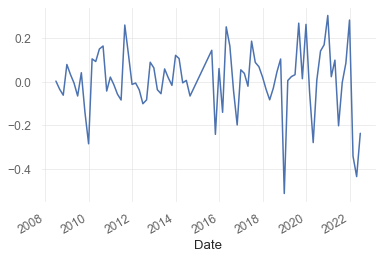

In [78]:
syn_index_returns.plot()

<AxesSubplot:xlabel='Date'>

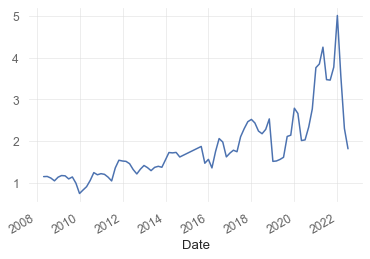

In [79]:
syn_index.plot()

In [80]:
synthetic_index

,0,1,2,3,4
Date,,,,,
2008-04-30,1.293477,1.134199,1.129104,1.118176,1.082295
2008-06-30,1.364383,1.155728,1.052877,1.081195,1.121743
2008-08-31,1.056710,1.157652,1.090955,1.147075,1.131599
2008-10-31,1.062046,1.111587,1.159678,1.135581,0.781931
2008-12-31,1.066722,1.130202,1.225534,1.477923,0.785217
...,...,...,...,...,...
2021-10-31,2.262080,1.871901,8.406950,4.951567,1.376451
2021-12-31,2.465359,9.066314,1.824340,5.233203,6.467675
2022-02-28,8.033859,4.119601,1.799580,2.138718,1.712334


In [81]:
def calcular_indice(cartera, data_precio):
    """
    Voy a equiponderar los pesos de cada activo
    en cartera.
    :return: índice sintético y retornos
    """
    synthetic_index = pd.DataFrame(np.zeros((cartera.shape[0], cartera.shape[1])), index=cartera.index)
    for idx in cartera.index:
        # Selecciono los activos de la cartera
        activos = cartera.loc[idx].tolist()

        # Cojo los precios del df de precios para esos activos

        for i in range(len(activos)):
            synthetic_index.loc[idx, i] = data_precio.loc[idx, activos[i]]

    # Ahora ya tengo un DF con los datos en base_cero de mis carteras.
    # Construyo el índice
    peso = 1/synthetic_index.shape[1]
    syn_index = np.sum(synthetic_index*peso, axis=1)
    syn_index_returns = np.log(syn_index).diff().dropna(axis=0)

    return syn_index, syn_index_returns

In [82]:
a, b = calcular_indice(cartera_sharpe, precio_cero_resample)

<AxesSubplot:xlabel='Date'>

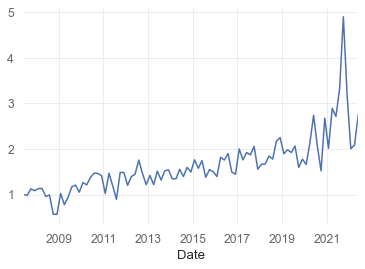

In [83]:
a.plot()

<AxesSubplot:xlabel='Date'>

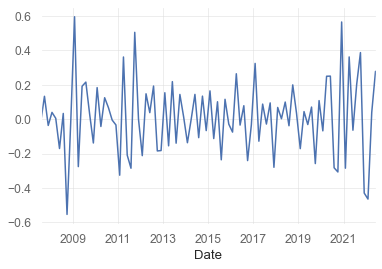

In [84]:
b.plot()

Llegado aquí, verfica si comparas retornos o precios

Haz un df con precios y otro con retornos

In [85]:
# Actauliza

In [86]:
# Momentum
momentum_index, momentum_returns = calcular_indice(cartera_momentum, precio_cero_resample)

<AxesSubplot:xlabel='Date'>

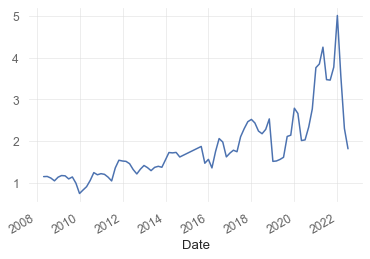

In [87]:
momentum_index.plot()

<AxesSubplot:xlabel='Date'>

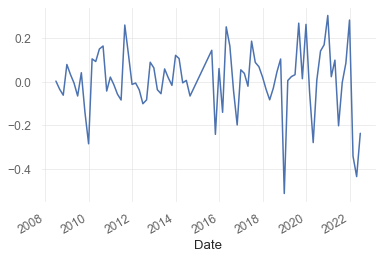

In [88]:
momentum_returns.plot()

<AxesSubplot:xlabel='Date'>

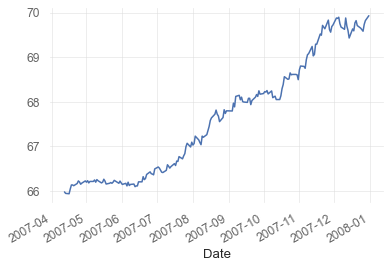

In [89]:
closeyf.loc[:'31-12-2007', 'SHY'].plot()

El cáclulo del ratio de sharpe está bien y viendo los datos tiene sentido...la varaición es muy baja con rentabilidad positiva. Quizá deberíamos contrastar los datos con otra fuente.

Comparo con la primera cartera que tenía por rentabilidad

In [90]:
ranking.iloc[1]

0    TLH
1    IEF
2    IEI
3    XLP
4    SHV
Name: 2007-06-30 00:00:00, dtype: object

Me hago una función que me ordene un df y me genere carteras seleccionando n_activos.

In [91]:
def seleccion_top_N(data, n_activos):
    ranking = []
    for fila in range(data.shape[0]):
        ranking.append(data.iloc[fila, :].sort_values(ascending=False).index)
        #print(ranking)
        #print("Hola")
        #ranking[fila] = ranking[fila].sort_values()

    ranking_df = pd.DataFrame(ranking, index=data.index)
    ranking_df = ranking_df.iloc[:, :5]
    # ranking_df.sort_values(,ascending=True)

    return ranking_df

Ahora voy a calcular ratios

Calculo la Beta

beta = cov(rent_i, rent_mercado)/var(rent_mercado)

In [92]:
def calcular_beta(data, indice, periodo):

    activos = data

    # Generamos las matrices de datos donde guardaremos los resultados.
    rent_activos=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)
    rent_indice=pd.DataFrame(np.zeros(len(indice)))

    # Calculamos la rentabilidad de los activos e índice.
    rent_activos = np.log(activos).diff()
    rent_indice = np.log(indice).diff()
    rent_activos.iloc[:1]=0
    rent_indice.iloc[0]=0 # Elimina el primer NaN sustituéndolo por 0

    # Calculamos la varianza del DAX
    varianza_indice = rent_indice.rolling(periodo).var()

    # Calculamos la covarianza del y activos
    cov_act_ind=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)

    # Recorro la matriz y calculo
    for activo in activos.columns:
        cov_act_ind.loc[:,activo] = rent_indice.rolling(periodo).cov(rent_activos.loc[:,activo])

    # Dataframe Beta
    beta=pd.DataFrame(np.zeros((cov_act_ind.shape[0] , cov_act_ind.shape[1])), index=cov_act_ind.index, columns=cov_act_ind.columns)

    # Sacamos la Beta del activo. β=cov(Rc,Rm)/σRm
    beta[periodo:beta.shape[0]] = cov_act_ind[periodo:rent_indice.shape[0]].div(varianza_indice[periodo:rent_indice.shape[0]], axis=0)

    return beta.iloc[periodo:,:]

In [93]:
beta = calcular_beta(closeyf, ew_index_base_cero, 40) # Tomo como reerncia 2M (40 días de trading)
beta

,IEF,SHV,XLP,IEI,TLH,ICF,GLD,HYG,IYZ,SHY,XLE,TIP,TLT,XLI,XLU,XLK,XLV,XLB,XLY,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-08,0.211381,0.001088,0.944894,0.093587,0.280748,2.226651,1.226691,0.069836,1.589648,0.016848,1.959680,0.207313,0.441805,1.277776,1.833458,1.313523,1.068884,2.003622,1.526523,1.595626
2007-06-11,0.217326,0.001199,0.939588,0.096748,0.287895,2.197819,1.188393,0.077202,1.592886,0.018671,1.973456,0.216029,0.452125,1.291749,1.836941,1.323185,1.032490,2.015212,1.535692,1.594317
2007-06-12,0.274879,0.002719,0.976704,0.136038,0.371612,2.219901,1.114974,0.145557,1.598629,0.031657,1.962955,0.247888,0.544266,1.325321,1.836262,1.330853,0.966569,1.909372,1.433183,1.462851
2007-06-13,0.279541,-0.002186,0.928396,0.135891,0.422779,2.088225,1.086189,0.149649,1.497047,0.026910,1.956359,0.267131,0.626493,1.439057,1.853144,1.306008,0.940750,1.976136,1.389312,1.511190
2007-06-14,0.275967,-0.000806,0.928108,0.131615,0.410295,2.081533,1.074351,0.150475,1.501690,0.024573,1.999548,0.263025,0.606308,1.435784,1.849297,1.329049,0.942288,1.991041,1.403263,1.472021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-06,0.034696,0.002501,0.996234,0.019757,0.075896,1.207178,0.129185,0.486709,1.240641,0.012796,1.293518,0.137945,0.094045,1.166187,0.687089,1.875542,1.023311,1.287368,2.037685,1.259613
2022-06-07,0.041542,0.002445,0.991948,0.022818,0.091166,1.212946,0.139474,0.484039,1.234341,0.012810,1.315010,0.140160,0.113646,1.171465,0.687324,1.869958,1.031949,1.279560,2.009357,1.255631
2022-06-08,0.038696,0.002426,1.009884,0.023363,0.084630,1.232964,0.151239,0.487594,1.232992,0.014407,1.263250,0.141696,0.099128,1.200700,0.696350,1.853031,1.014463,1.310156,1.998340,1.282719


In [94]:
beta_resample = beta.resample('2M').last()
beta_resample

,IEF,SHV,XLP,IEI,TLH,ICF,GLD,HYG,IYZ,SHY,XLE,TIP,TLT,XLI,XLU,XLK,XLV,XLB,XLY,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-30,0.309673,-0.000554,0.816943,0.161720,0.470026,2.132038,0.919117,0.192259,1.385601,0.047015,2.145683,0.307596,0.685657,1.330215,2.061729,1.266884,1.016434,1.875755,1.197919,1.523487
2007-08-31,-0.344889,-0.018860,1.066271,-0.290383,-0.350032,2.265595,0.424855,0.548273,1.731017,-0.133404,2.301933,-0.231746,-0.362646,1.873064,2.025009,1.598842,1.276160,2.349702,1.996863,2.381969
2007-10-31,-0.271371,-0.008680,0.793630,-0.109848,-0.161688,2.203475,0.622392,0.706351,1.434191,-0.059621,2.519222,-0.087188,-0.347125,1.824581,1.417361,1.413628,1.198912,2.629582,1.890726,2.350527
2007-12-31,-0.472904,-0.022735,0.963739,-0.380385,-0.534626,2.752557,0.979898,0.076076,2.372546,-0.169999,2.937232,-0.489398,-0.613351,1.847493,1.018011,1.843916,1.199295,2.772799,1.767895,2.939296
2008-02-29,-0.295055,-0.014492,1.026005,-0.205479,-0.261882,3.015787,0.156441,0.087059,2.326259,-0.095755,2.603637,-0.145155,-0.250527,1.825009,1.697219,1.846277,0.953559,2.434309,2.146160,3.265934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,0.068492,0.001500,0.966254,0.028260,0.163769,1.174528,0.119178,0.319803,1.246921,0.006645,1.429352,0.090886,0.244343,1.504188,0.995046,1.761265,1.216597,1.577145,1.362981,1.611390
2021-12-31,-0.236451,0.002993,0.757433,-0.114622,-0.328955,1.373658,0.253753,0.444535,0.960686,-0.018399,1.915874,0.094214,-0.528275,1.587559,0.842433,2.094104,0.713918,1.303967,1.889120,1.471708
2022-02-28,0.129442,0.004503,0.536451,0.105173,0.131502,1.264004,-0.005829,0.405949,1.506408,0.054823,0.379712,0.153906,0.129001,1.211188,0.801763,2.099869,1.039041,1.274584,2.018545,1.135016


In [95]:
cartera_beta = seleccion_top_N(beta_resample, 5)
cartera_beta

,0,1,2,3,4
Date,,,,,
2007-06-30,XLE,ICF,XLU,XLB,XLF
2007-08-31,XLF,XLB,XLE,ICF,XLU
2007-10-31,XLB,XLE,XLF,ICF,XLY
2007-12-31,XLF,XLE,XLB,ICF,IYZ
2008-02-29,XLF,ICF,XLE,XLB,IYZ
...,...,...,...,...,...
2021-10-31,XLK,XLF,XLB,XLI,XLE
2021-12-31,XLK,XLE,XLY,XLI,XLF
2022-02-28,XLK,XLY,IYZ,XLB,ICF


Me puede interesar buscar o filtar los ETFs con Beta positiva máxima. Esto me va a indicar que activos se han movido más que el mercado. Si pienso en que busco los activos que "amplifican" el valor del mercado en la dirección del movimineto, debería estar obteniendo los valores que más tiran de mi índice sintético

Alfa de Jensen

alpha = (rentabilidad_cartera -fisk_free) - Beta*(rentabilidad_mercado - risk_free)

In [96]:
def calcular_alfa_jensen(data, indice, periodo):
    '''Supongo la rentabilidad del activo libre
    de riesgo '0'. POr eso no cosidero éste activo en
    el cálculo. Voy a calcular la alfa de cada activo
    sólo sobre el índice.
    '''
    # No Llamo a la función calcular Beta porque necesito las tripas
    activos = data

    # Generamos las matrices de datos donde guardaremos los resultados.
    rent_activos=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)
    alpha_activos=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)
    rent_indice=pd.DataFrame(np.zeros(len(indice)))

    # Calculamos la rentabilidad de los activos e índice.
    rent_activos = np.log(activos).diff()
    rent_indice = np.log(indice).diff()
    rent_activos.iloc[:1]=0
    rent_indice.iloc[0]=0 # Elimina el primer NaN sustituéndolo por 0

    # Calculamos la varianza del DAX
    varianza_indice = rent_indice.rolling(periodo).var()

    # Calculamos la covarianza del DAX y activos
    cov_act_ind=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)

    # Recorro la matriz y calculo
    for activo in activos.columns:
        cov_act_ind.loc[:,activo] = rent_indice.rolling(periodo).cov(rent_activos.loc[:,activo])

    # Dataframe Beta
    beta=pd.DataFrame(np.zeros((cov_act_ind.shape[0] , cov_act_ind.shape[1])), index=cov_act_ind.index, columns=cov_act_ind.columns)

    # Sacamos la Beta del activo. β=cov(Rc,Rm)/σRm
    beta[periodo:beta.shape[0]] = cov_act_ind[periodo:rent_indice.shape[0]].div(varianza_indice[periodo:rent_indice.shape[0]], axis=0)

    # Ahora calculo alfa:
    alpha=pd.DataFrame(np.zeros((cov_act_ind.shape[0] , cov_act_ind.shape[1])), index=cov_act_ind.index, columns=cov_act_ind.columns)
    Rfactivos=pd.DataFrame(np.ones((beta.shape[0] , beta.shape[1])), index=beta.index, columns=beta.columns)

     # Calculamos el Alpha del activo. α=Rc-(Rf+β(Rm-Rf))
    alpha[periodo:alpha.shape[0]] = (rent_activos[periodo:rent_activos.shape[0]] -
                                beta[periodo:beta.shape[0]].mul(rent_indice[periodo:rent_activos.shape[0]], axis=0)
                                )

    alpha=alpha[periodo:alpha.shape[0]]

    return alpha

In [97]:
alpha = calcular_alfa_jensen(closeyf, ew_index_base_cero, 40)
alpha

,IEF,SHV,XLP,IEI,TLH,ICF,GLD,HYG,IYZ,SHY,XLE,TIP,TLT,XLI,XLU,XLK,XLV,XLB,XLY,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-08,0.000744,0.000177,0.000822,-0.000497,-0.000871,-0.001878,-0.022584,-0.003057,0.007807,0.000287,-0.006284,0.000734,-0.003184,0.007017,-0.002590,0.006927,-0.002328,0.008342,0.004652,0.003140
2007-06-11,-0.002615,0.000091,0.005455,0.000203,-0.002689,-0.017289,0.007456,-0.002114,-0.001748,0.000126,0.007643,-0.002140,-0.002865,0.001303,0.013166,0.001981,0.000288,-0.008685,-0.003291,0.004570
2007-06-12,-0.004458,0.000118,0.000052,-0.002936,-0.007640,0.004219,0.001542,-0.003695,0.001670,-0.000570,0.006768,-0.003833,-0.009285,-0.000096,0.001418,0.001076,0.002136,0.006286,0.005780,0.000514
2007-06-13,0.000390,-0.000160,-0.001885,0.000229,0.003387,-0.009147,-0.004468,0.000202,-0.006478,-0.000025,-0.000316,0.000948,0.005397,0.008765,0.000698,-0.000738,-0.001547,0.002944,-0.002785,0.003284
2007-06-14,-0.000629,0.000734,-0.001510,-0.000825,-0.002869,-0.006638,-0.002342,0.000293,0.002270,-0.000078,0.010307,-0.000224,-0.004456,0.000522,0.000344,0.005163,-0.000223,0.001277,0.002602,-0.006292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-06,-0.007524,-0.000181,0.000757,-0.004014,-0.015565,-0.003451,-0.004368,-0.007359,0.002289,-0.001320,-0.000662,-0.006481,-0.018583,0.004589,0.004671,0.000732,0.000515,0.009870,0.010669,0.003308
2022-06-07,0.003688,-0.000020,-0.002649,0.001663,0.007762,0.002367,0.005384,-0.001559,-0.004316,0.000018,0.018932,0.001261,0.009835,0.004007,0.000523,-0.003064,0.004697,-0.003036,-0.018497,-0.002329
2022-06-08,-0.003341,-0.000067,-0.002310,-0.001529,-0.006480,-0.012475,0.000575,-0.003762,0.010764,-0.000580,0.014707,-0.001058,-0.007916,-0.006349,-0.012849,0.007033,0.002130,-0.007983,0.013912,-0.005020


In [98]:
alpha_resample = alpha.resample('2M').last()
alpha_resample

,IEF,SHV,XLP,IEI,TLH,ICF,GLD,HYG,IYZ,SHY,XLE,TIP,TLT,XLI,XLU,XLK,XLV,XLB,XLY,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-30,0.004657,2.744143e-04,-0.000301,0.002939,0.007499,-0.010620,-0.001432,-0.003177,-0.005060,0.001917,-0.000222,0.005346,0.009084,0.001295,0.004302,-0.005698,-0.004584,0.002952,-0.000796,-0.008145
2007-08-31,0.002380,-6.494019e-05,-0.004018,0.001510,0.001385,0.007309,0.008244,0.005584,-0.003192,0.000829,-0.001182,0.001045,0.003041,0.003445,-0.014649,-0.003382,-0.003266,-0.005616,0.003843,-0.001674
2007-10-31,-0.004865,-3.166183e-05,0.000915,-0.002741,-0.001130,0.000648,0.012019,0.001437,-0.001448,-0.001188,0.009285,-0.004158,-0.006692,-0.003839,0.001893,0.001996,-0.002091,0.008074,-0.009955,-0.002683
2007-12-31,0.003555,-2.328040e-04,-0.005807,0.002190,0.004251,0.015145,-0.004344,0.002356,-0.005830,0.001204,-0.006228,0.005452,0.004671,-0.000470,-0.011574,-0.003366,-0.001003,0.000200,0.000276,0.006203
2008-02-29,0.007671,3.566250e-05,-0.008684,0.006243,0.010299,0.008508,0.003548,-0.002957,-0.008736,0.002489,-0.007602,0.008998,0.012669,-0.009425,-0.012820,-0.002017,-0.004353,-0.008293,-0.003674,-0.000336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,0.000444,-1.808398e-04,-0.000868,-0.000152,0.001035,-0.010605,-0.008530,-0.002604,-0.007059,0.000117,-0.006421,-0.002551,0.003081,0.000465,-0.005843,0.004489,0.009830,-0.004619,0.002749,-0.003776
2021-12-31,-0.001101,-3.627768e-07,0.006675,-0.000297,0.002199,0.003125,0.006778,-0.000284,-0.006779,-0.000115,0.002293,-0.001249,0.002023,0.004069,0.003397,-0.005131,-0.004336,0.004266,-0.002623,-0.001969
2022-02-28,0.011084,-9.827593e-05,-0.014296,0.006185,0.019190,-0.020292,0.010322,0.000035,-0.009487,0.001683,0.023743,0.016951,0.021465,0.005601,0.003818,-0.005346,-0.009336,-0.013591,0.003620,-0.016853


Calculo las carteras con alpha de jensen

In [99]:
cartera_alpha = seleccion_top_N(alpha_resample, 5)

Ratio Sharpe

Sharpe = (rent_i - risk_free)/sigma

In [100]:
def calcula_sharpe(data, periodo_ajuste=252):
    """Voy a calcular el ratio de sharpe con
    retorno log.
    Voy a considerar la rentabilidad del activo libre
    de riesgo igual a 0.

    Por defecto, voy a trabajar en ventana de 6 meses,
    pero dejo input para modificar este valor.
    """
    rent_activos = np.log(data).diff()
    volatilidad = rent_activos.std()
    # sharpe = rent_activos.iloc[ventana:] / volatilidad.iloc[ventana:]
    sharpe = np.sqrt(periodo_ajuste)*(rent_activos / volatilidad)
    sharpe.replace([np.inf, -np.inf], 0, inplace=True)

    return sharpe


In [101]:
sharpe = calcula_sharpe(closeyf, 252)
sharpe.head()

,IEF,SHV,XLP,IEI,TLH,ICF,GLD,HYG,IYZ,SHY,XLE,TIP,TLT,XLI,XLU,XLK,XLV,XLB,XLY,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-13,-6.352028,13.120792,5.578866,-7.095102,-5.329049,10.874372,17.857828,-3.955006,5.052886,-9.369440,0.377147,-9.883799,-5.187077,-0.308139,-0.317389,0.919963,20.417030,2.329785,0.849401,3.228634
2007-04-16,4.083562,13.101541,3.708839,4.519110,8.878114,-1.958908,11.643435,-0.835165,11.109686,-2.335502,4.636146,12.647676,9.210112,8.904236,7.587218,9.159791,13.449018,13.353906,10.990535,18.460970
2007-04-17,15.846035,6.563908,15.366596,20.610567,11.115472,10.675422,-8.306915,-1.040263,-1.427492,30.392973,-4.510593,2.366050,9.349927,0.000000,5.974109,2.277659,4.323523,-9.483917,4.477075,-0.209660
2007-04-18,8.569449,45.829504,-4.288531,9.640261,7.805165,-4.381786,7.892637,0.624218,2.853199,25.697816,-2.768843,12.991727,8.351598,3.053985,9.376874,-2.733780,-0.392172,-5.422303,-0.837751,8.758232


Por curiosidad hago un resample de 2 meses

In [102]:
sharpe_resample = calcula_sharpe(closeyf, 252).resample('2M').last()
sharpe_resample.head()

,IEF,SHV,XLP,IEI,TLH,ICF,GLD,HYG,IYZ,SHY,XLE,TIP,TLT,XLI,XLU,XLK,XLV,XLB,XLY,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-30,16.198600,13.089998,-6.107035,19.231817,13.578986,-5.903526,-9.887481,0.207464,-5.727900,13.981851,-9.445692,21.142812,17.466823,-13.071488,-4.949451,-8.515501,-4.671645,-18.566113,-14.059482,-5.984597
2007-06-30,19.415151,19.567632,1.860609,20.823533,21.045338,-5.223378,0.220266,-6.177803,-3.041211,37.455450,2.760716,23.254596,17.211727,3.994186,10.151120,-3.855725,-3.982076,6.223678,1.402299,-4.226963
2007-08-31,0.888511,-13.030056,4.368423,-1.902181,-1.999445,16.100386,15.413408,19.523181,8.623248,0.000000,10.392620,-1.559548,1.321405,16.763904,-2.672488,7.196102,6.563589,9.025911,17.899060,10.061681
2007-10-31,-25.147093,-6.523551,10.656041,-22.602729,-5.668864,11.862099,23.065610,13.636291,9.562106,-29.927813,21.039692,-18.815752,-15.205270,9.636770,14.987987,12.840803,8.629418,26.234074,3.311930,10.298018
2007-12-31,17.233166,-13.033829,-13.336120,19.649409,13.779559,6.785680,-9.244731,4.749085,-12.678949,29.668515,-10.119386,25.886857,10.120025,-5.098156,-17.869994,-8.211625,-5.175157,-6.008321,-4.035645,-0.265062


Tengo que eliminar la primera fila para que me cuadren las fechas

In [103]:
sharpe_resample = sharpe_resample.iloc[1:, :]
sharpe_resample

,IEF,SHV,XLP,IEI,TLH,ICF,GLD,HYG,IYZ,SHY,XLE,TIP,TLT,XLI,XLU,XLK,XLV,XLB,XLY,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-30,19.415151,19.567632,1.860609,20.823533,21.045338,-5.223378,0.220266,-6.177803,-3.041211,37.455450,2.760716,23.254596,17.211727,3.994186,10.151120,-3.855725,-3.982076,6.223678,1.402299,-4.226963
2007-08-31,0.888511,-13.030056,4.368423,-1.902181,-1.999445,16.100386,15.413408,19.523181,8.623248,0.000000,10.392620,-1.559548,1.321405,16.763904,-2.672488,7.196102,6.563589,9.025911,17.899060,10.061681
2007-10-31,-25.147093,-6.523551,10.656041,-22.602729,-5.668864,11.862099,23.065610,13.636291,9.562106,-29.927813,21.039692,-18.815752,-15.205270,9.636770,14.987987,12.840803,8.629418,26.234074,3.311930,10.298018
2007-12-31,17.233166,-13.033829,-13.336120,19.649409,13.779559,6.785680,-9.244731,4.749085,-12.678949,29.668515,-10.119386,25.886857,10.120025,-5.098156,-17.869994,-8.211625,-5.175157,-6.008321,-4.035645,-0.265062
2008-02-29,39.760846,12.963543,-31.829077,53.736399,32.736017,-16.393154,2.800690,-8.320867,-36.602627,64.660285,-26.734764,41.367075,25.452614,-30.846883,-38.549008,-22.583289,-19.611305,-32.901477,-27.785997,-25.400055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,1.631222,-12.952933,-1.646372,-1.002987,2.571214,-8.089738,-12.101458,-5.738152,-8.219382,2.182274,-5.221457,-10.135265,5.115311,0.319175,-7.694556,4.703337,13.640373,-4.829576,2.851501,-3.041085
2021-12-31,-4.224580,0.000000,11.343937,-2.011129,5.466077,2.478403,9.642811,-0.498961,-7.598990,-2.191260,2.001069,-4.897247,3.283435,4.737712,4.516783,-5.358082,-5.984193,4.446843,-2.637263,-1.373239
2022-02-28,42.258488,-6.490522,-22.455797,41.156389,49.151143,-13.679518,14.605079,1.558203,-7.932061,33.272296,19.316844,68.093127,36.343569,8.490150,6.668763,-1.994973,-10.686137,-11.506132,7.726184,-11.458753


Calulo el top_5

In [104]:
cartera_sharpe = seleccion_top_N(sharpe_resample, 5)
cartera_sharpe

,0,1,2,3,4
Date,,,,,
2007-06-30,SHY,TIP,TLH,IEI,SHV
2007-08-31,HYG,XLY,XLI,ICF,GLD
2007-10-31,XLB,GLD,XLE,XLU,HYG
2007-12-31,SHY,TIP,IEI,IEF,TLH
2008-02-29,SHY,IEI,TIP,IEF,TLH
...,...,...,...,...,...
2021-10-31,XLV,TLT,XLK,XLY,TLH
2021-12-31,XLP,GLD,TLH,XLI,XLU
2022-02-28,TIP,TLH,IEF,IEI,TLT


Comparo con la primera cartera que tenía por rentabilidad

In [105]:
ranking.iloc[1]

0    TLH
1    IEF
2    IEI
3    XLP
4    SHV
Name: 2007-06-30 00:00:00, dtype: object

Idea. Puedo construir carteras y asigna peso a cada ETF por cada cartera en la que aparezac. Puedo equiponderar y asignar peso/num_carteras

Cuántas carteras hago?
- Jensen
- Sharpe
- Beta
- Momentum
- Media_Movil_Close>Indice equiponderado--> Selecciono los 5 que más se separen porcentualmente de la media.

Qué etiquetas tiene la red?

Momentum

In [106]:

from pandas import Timestamp

def calculate_momentum(data):
    '''Esta función calcula el momentum para un sólo activo.
    En caso de querer aplicarla a un DF, los datos
    deben ser introducidos en bucle for o usada en
    en apply()
    '''
    # Calculo el log de los datos para transformar el dataset. Son precios de cierre en escala log
    # Con esto convierto el problema de la regresión exponencial en lineal.
    # REcuerda que usamos reg exponencial porque viene epresada en %, mientras que la reg lineal, lo están en $
    log_data = np.log(data)

    # Horizontal values
    # Piensa que esto es
    x_data = np.arange(len(log_data))

    # De la regresión, sólo me interesan la pendiente y la precisión:
    beta, _, rvalue, _, _ = linregress(x_data, log_data)

    # Anualizamos la pendiente. Esto tengo que valorarlo en función de cómo quiero que
    # evolucione mi algoritmo. Creo que no me interesa anualizar y trabajar en ventana rodante
    # Si no anualizamos, calcularemos el porcentaje de movimiento por día.
    # Y multiplicamos por la precisión del modelo
    # Al mulitplicar por r2, está filtrando acciones con momentum alto pero mal ajustados
    # R2 = 1 - RSS/TSS
    return  (1+beta)**252*(rvalue**2)

Ahora tengo que calcular el momentum de cada ETF.

In [107]:
def filtro_momentum(data, periodo_momentum, resampling='2M'):
    """Este filtro se basa en una condición de momento positvo
    en ventana rodante.

    La función tiene que ser capaz de calcular el rolling
    sharpe porque puede ser usada como filtor de una estrategia
    que no realiza este cálculo

    Inputs: data, periodo de resampling

    Devuelve un DF con la condición True/False
    """
    # Calculo momentum
    momentum = pd.DataFrame(columns = data.columns)

    for stock in data.columns:
        # Voy a recorrer la lista de acciones para calcular su ventana rodante
        # y sobre ese dato, calculo el momento usando apply. PIensa que lo que estás haciend
        # es calcular la regresión exponencial cada X días
        momentum[stock] = data[stock].rolling(periodo_momentum).apply(calculate_momentum, raw=False)

    momentum = momentum.resample('{}'.format(resampling)).last()

    return momentum

In [108]:
momentum = filtro_momentum(closeyf, 252, '2M').dropna(axis=0)
momentum

,IEF,SHV,XLP,IEI,TLH,ICF,GLD,HYG,IYZ,SHY,XLE,TIP,TLT,XLI,XLU,XLK,XLV,XLB,XLY,XLF
Date,,,,,,,,,,,,,,,,,,,,
2008-04-30,1.110707,1.044139,0.301538,1.109103,1.053578,0.379495,1.422601,0.005881,0.529020,1.072448,0.595733,1.121585,1.005307,0.150747,0.001796,0.264057,0.404696,0.169783,0.644783,0.581926
2008-06-30,0.908177,0.999096,0.218390,0.899662,0.815253,0.120756,1.151672,0.047360,0.505068,0.929558,0.725511,1.029274,0.713292,0.277748,0.065981,0.308673,0.495135,0.369920,0.571883,0.561821
2008-08-31,0.672063,0.959989,0.019643,0.664669,0.566427,0.151197,0.524573,0.259054,0.487211,0.774219,0.218193,0.874478,0.421460,0.456221,0.082288,0.409694,0.498761,0.017157,0.534127,0.521219
2008-10-31,0.485443,0.964613,0.137019,0.567254,0.347621,0.150298,0.015351,0.317999,0.397418,0.739391,0.128358,0.043124,0.382262,0.367633,0.383555,0.386536,0.466259,0.209571,0.374532,0.454955
2008-12-31,0.457109,0.986052,0.337984,0.584560,0.391585,0.255650,0.393967,0.426782,0.384330,0.740122,0.296376,0.259368,0.512775,0.388247,0.444888,0.381919,0.475475,0.317273,0.384574,0.343999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,0.182219,0.757083,0.861668,0.318897,0.124574,1.319679,0.178921,0.908268,0.832395,0.174131,1.036176,0.847209,0.084541,0.954980,0.645001,1.206444,1.112250,0.893675,1.028997,1.293394
2021-12-31,0.000399,0.864796,0.927121,0.328004,0.075854,1.277113,0.013043,0.792512,0.252449,0.558064,0.786432,0.915263,0.190744,0.721851,0.805274,1.234905,1.037634,0.757973,1.018417,1.040579
2022-02-28,0.013216,0.779596,0.924160,0.431487,0.118529,0.852902,0.112162,0.092709,0.079107,0.617547,0.840256,0.600643,0.255052,0.218773,0.676239,0.952519,0.766719,0.416780,0.634197,0.893721


El problema es que me como un año de histórico...Hay que valorarlo

In [109]:
cartera_momentum = seleccion_top_N(momentum, 5)
cartera_momentum

,0,1,2,3,4
Date,,,,,
2008-04-30,GLD,TIP,IEF,IEI,SHY
2008-06-30,GLD,TIP,SHV,SHY,IEF
2008-08-31,SHV,TIP,SHY,IEF,IEI
2008-10-31,SHV,SHY,IEI,IEF,XLV
2008-12-31,SHV,SHY,IEI,TLT,XLV
...,...,...,...,...,...
2021-10-31,ICF,XLF,XLK,XLV,XLE
2021-12-31,ICF,XLK,XLF,XLV,XLY
2022-02-28,XLK,XLP,XLF,ICF,XLE


Media móvil. Pongo por defecto un periodo de 252, que es un año de trading y parece un periodo macro razonable. Otra alternativa sería fijar 40 ó 60 días en función de lo que acordemos como marco de referencia y comparar.

In [110]:
def filtro_SMA(data, indice, periodo=252, resampling='2M'):
    """Este filtro se basa en una media móvil simple
    sobre le precio de cierre.

    La función tiene que ser capaz de calcular el rolling
    sharpe porque puede ser usada como filtor de una estrategia
    que no realiza este cálculo

    Inputs: data con precios de cierre, índice con precios de cierre
            periodo_sma y periodo de resampling

    Devuelve un DF con la condición True/False
    """
    # Calculo SMA del dataframe de datos
    sma_data = data.rolling(periodo).mean().resample(resampling).last().dropna(axis=0)
    # Ahora mi índice
    sma_index = indice.rolling(252).mean().resample('2M').last().dropna(axis=0)


    sma_distance = sma_data.sub(sma_index, axis=0)

    # return
    return sma_distance

Cómo calculo la distancia a la media del índice:
- Calculo media móvil del precio de cada ETF.
- Calculo media móvil de mi índice sintético.
- Resto mm_etf - mm_índice.
- Ordeno y cojo los 5 que más se separan. No voy a exigir que la dif sea positiva, no quiero los que sean positivos, sino los que mejor se hayan comportado sobre la media; habrá periodos en los que alguno de los top5 sea negativo? O exigo que sea positivo y genero cartera con num_activos <= 5. Esto también tendría sentido si lo que voy a asignar es un peso positivo en cartera a los activos top.

Voy a descojonar el cálculo a ver qué estoy haciendo...

In [111]:
# Calculo un df con la media móvil de los precios de cierre
sma_data = closeyf.rolling(252).mean().resample('2M').last().dropna(axis=0)
sma_data

,IEF,SHV,XLP,IEI,TLH,ICF,GLD,HYG,IYZ,SHY,XLE,TIP,TLT,XLI,XLU,XLK,XLV,XLB,XLY,XLF
Date,,,,,,,,,,,,,,,,,,,,
2008-04-30,61.778190,100.018125,18.773581,81.888412,71.021182,26.392587,77.556270,39.998627,19.901512,68.929406,47.528089,69.591934,59.541680,28.719352,23.913329,20.272926,26.819943,29.662396,28.720947,19.170911
2008-06-30,62.959213,100.735810,18.901334,83.300725,72.228082,25.849838,81.268016,40.029271,19.105620,69.752050,49.630926,71.142614,60.558224,28.671855,24.017867,20.189368,26.262710,30.224280,27.714045,17.936824
2008-08-31,64.177811,101.385019,19.041127,84.705566,73.518628,25.400175,84.982301,40.066649,18.027872,70.531024,50.422403,72.756067,61.686195,28.116435,24.029858,19.789840,25.997603,30.255693,26.563145,16.575352
2008-10-31,65.299558,101.980424,18.934438,86.161076,74.687887,24.112960,86.269682,38.965150,16.456829,71.324809,48.590923,73.470727,62.940838,26.670684,23.229504,18.657545,25.199945,29.039676,25.077945,14.958403
2008-12-31,66.700253,102.466173,18.414489,87.805474,76.315310,22.102624,85.985198,37.243529,15.030654,72.068930,45.672907,73.265792,65.103966,24.721312,21.971935,17.185300,23.959025,26.923774,23.330728,13.261357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,115.199808,110.391570,67.135239,130.095380,146.711429,59.886696,169.363690,83.114068,31.335988,85.896930,45.700999,119.570077,144.012083,95.871508,62.751022,139.151243,120.027986,77.991548,171.218942,33.864863
2021-12-31,114.543520,110.376542,68.586655,129.595111,145.263645,63.203389,168.311230,83.769087,31.891675,85.819108,49.267595,120.853574,142.852996,99.134428,63.916723,147.107221,124.418974,81.204194,179.652895,35.899429
2022-02-28,113.775401,110.347761,70.453575,128.844212,144.055240,65.635536,168.245635,83.876161,31.956360,85.622094,52.962298,121.416266,141.847923,101.264663,65.143689,151.427236,127.125389,83.146644,182.814937,37.316411


In [112]:
# Ahora mi índice
sma_index = ew_index_base_cero.rolling(252).mean().resample('2M').last().dropna(axis=0)
sma_index

Date
2008-04-30    1.028861
2008-06-30    1.033107
2008-08-31    1.032524
2008-10-31    1.011873
2008-12-31    0.980847
                ...   
2021-10-31    2.668960
2021-12-31    2.743476
2022-02-28    2.789417
2022-04-30    2.825826
2022-06-30    2.821995
Freq: 2M, Length: 86, dtype: float64

In [113]:
dif = sma_data.sub(sma_index, axis=0)
dif

,IEF,SHV,XLP,IEI,TLH,ICF,GLD,HYG,IYZ,SHY,XLE,TIP,TLT,XLI,XLU,XLK,XLV,XLB,XLY,XLF
Date,,,,,,,,,,,,,,,,,,,,
2008-04-30,60.749329,98.989264,17.744720,80.859551,69.992321,25.363726,76.527408,38.969765,18.872651,67.900545,46.499228,68.563073,58.512819,27.690491,22.884467,19.244065,25.791081,28.633535,27.692086,18.142050
2008-06-30,61.926106,99.702703,17.868227,82.267617,71.194975,24.816730,80.234908,38.996163,18.072513,68.718943,48.597818,70.109507,59.525117,27.638748,22.984760,19.156260,25.229602,29.191173,26.680938,16.903717
2008-08-31,63.145287,100.352495,18.008603,83.673042,72.486104,24.367651,83.949777,39.034125,16.995348,69.498500,49.389879,71.723543,60.653671,27.083911,22.997334,18.757316,24.965079,29.223170,25.530622,15.542828
2008-10-31,64.287684,100.968551,17.922564,85.149203,73.676014,23.101087,85.257809,37.953277,15.444955,70.312935,47.579049,72.458854,61.928964,25.658811,22.217630,17.645672,24.188072,28.027803,24.066072,13.946529
2008-12-31,65.719406,101.485325,17.433642,86.824627,75.334463,21.121777,85.004351,36.262682,14.049807,71.088082,44.692059,72.284944,64.123118,23.740465,20.991088,16.204453,22.978178,25.942927,22.349880,12.280509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,112.530848,107.722610,64.466280,127.426420,144.042469,57.217736,166.694731,80.445109,28.667028,83.227970,43.032039,116.901117,141.343123,93.202549,60.082063,136.482283,117.359026,75.322589,168.549982,31.195903
2021-12-31,111.800044,107.633067,65.843180,126.851635,142.520170,60.459913,165.567754,81.025611,29.148199,83.075632,46.524120,118.110098,140.109521,96.390953,61.173247,144.363745,121.675498,78.460719,176.909419,33.155954
2022-02-28,110.985984,107.558344,67.664158,126.054795,141.265823,62.846119,165.456218,81.086744,29.166943,82.832676,50.172881,118.626849,139.058506,98.475246,62.354272,148.637819,124.335972,80.357227,180.025520,34.526994


In [114]:
media = filtro_SMA(closeyf, ew_index_base_cero, 252, '2M')
media

,IEF,SHV,XLP,IEI,TLH,ICF,GLD,HYG,IYZ,SHY,XLE,TIP,TLT,XLI,XLU,XLK,XLV,XLB,XLY,XLF
Date,,,,,,,,,,,,,,,,,,,,
2008-04-30,60.749329,98.989264,17.744720,80.859551,69.992321,25.363726,76.527408,38.969765,18.872651,67.900545,46.499228,68.563073,58.512819,27.690491,22.884467,19.244065,25.791081,28.633535,27.692086,18.142050
2008-06-30,61.926106,99.702703,17.868227,82.267617,71.194975,24.816730,80.234908,38.996163,18.072513,68.718943,48.597818,70.109507,59.525117,27.638748,22.984760,19.156260,25.229602,29.191173,26.680938,16.903717
2008-08-31,63.145287,100.352495,18.008603,83.673042,72.486104,24.367651,83.949777,39.034125,16.995348,69.498500,49.389879,71.723543,60.653671,27.083911,22.997334,18.757316,24.965079,29.223170,25.530622,15.542828
2008-10-31,64.287684,100.968551,17.922564,85.149203,73.676014,23.101087,85.257809,37.953277,15.444955,70.312935,47.579049,72.458854,61.928964,25.658811,22.217630,17.645672,24.188072,28.027803,24.066072,13.946529
2008-12-31,65.719406,101.485325,17.433642,86.824627,75.334463,21.121777,85.004351,36.262682,14.049807,71.088082,44.692059,72.284944,64.123118,23.740465,20.991088,16.204453,22.978178,25.942927,22.349880,12.280509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,112.530848,107.722610,64.466280,127.426420,144.042469,57.217736,166.694731,80.445109,28.667028,83.227970,43.032039,116.901117,141.343123,93.202549,60.082063,136.482283,117.359026,75.322589,168.549982,31.195903
2021-12-31,111.800044,107.633067,65.843180,126.851635,142.520170,60.459913,165.567754,81.025611,29.148199,83.075632,46.524120,118.110098,140.109521,96.390953,61.173247,144.363745,121.675498,78.460719,176.909419,33.155954
2022-02-28,110.985984,107.558344,67.664158,126.054795,141.265823,62.846119,165.456218,81.086744,29.166943,82.832676,50.172881,118.626849,139.058506,98.475246,62.354272,148.637819,124.335972,80.357227,180.025520,34.526994


In [115]:
cartera_media = seleccion_top_N(media, 5)
cartera_media

,0,1,2,3,4
Date,,,,,
2008-04-30,SHV,IEI,GLD,TLH,TIP
2008-06-30,SHV,IEI,GLD,TLH,TIP
2008-08-31,SHV,GLD,IEI,TLH,TIP
2008-10-31,SHV,GLD,IEI,TLH,TIP
2008-12-31,SHV,IEI,GLD,TLH,TIP
...,...,...,...,...,...
2021-10-31,XLY,GLD,TLH,TLT,XLK
2021-12-31,XLY,GLD,XLK,TLH,TLT
2022-02-28,XLY,GLD,XLK,TLH,TLT


Cojo como fecha de partida para comparar el 30/06/2008, que sería la primera fecha que podríamos utilizar con esta propuesta

In [116]:
print("Cartera de media móvil", cartera_media.iloc[1,:])
print("Cartera Momentum", cartera_momentum.iloc[1, :])
print("Cartera Sharpe", cartera_sharpe.iloc[6,:])
print("Cartera Alpha de Jensen", cartera_alpha.iloc[6, :])
print("Cartera Beta", cartera_beta.iloc[6,:])

Cartera de media móvil 0    SHV
1    IEI
2    GLD
3    TLH
4    TIP
Name: 2008-06-30 00:00:00, dtype: object
Cartera Momentum 0    GLD
1    TIP
2    SHV
3    SHY
4    IEF
Name: 2008-06-30 00:00:00, dtype: object
Cartera Sharpe 0    XLU
1    SHV
2    IYZ
3    XLV
4    XLP
Name: 2008-06-30 00:00:00, dtype: object
Cartera Alpha de Jensen 0    XLU
1    IYZ
2    XLE
3    XLV
4    XLI
Name: 2008-06-30 00:00:00, dtype: object
Cartera Beta 0    ICF
1    XLB
2    IYZ
3    XLE
4    XLF
Name: 2008-06-30 00:00:00, dtype: object


In [117]:
carteras = pd.DataFrame([cartera_media.iloc[1,:], cartera_momentum.iloc[1, :], cartera_sharpe.iloc[6,:], cartera_alpha.iloc[6, :],                              cartera_beta.iloc[6,:]])
carteras

,0,1,2,3,4
2008-06-30,SHV,IEI,GLD,TLH,TIP
2008-06-30,GLD,TIP,SHV,SHY,IEF
2008-06-30,XLU,SHV,IYZ,XLV,XLP
2008-06-30,XLU,IYZ,XLE,XLV,XLI
2008-06-30,ICF,XLB,IYZ,XLE,XLF


Qué sentido tiene esto?? Veo por sectores

"XLB", # Materials. 1998-12-22
"XLE", # Energy. 1998-12-22
"XLF", # Financial. 1998-12-22
"XLI", # Industrial. 1998-12-22
"XLK", # Technology. 1998-12-22
"XLP", # Consumer Saples. 1998-12-22  (productos básicos de consumo)
"XLU", # Utilities. 1998-12-22
"XLV", # Health Care. 1998-12-22
"XLY", # Consumer Discretionary. 1998-12-22
"GLD", # Oro. 2004-11-18 *******************************
"SHV", # Short Treasury Bond. 2007-01-11 ***************
"SHY", # 1-3 Year Treasury Bond. 2002-07-30
"IEI", # 3-7 Year Treasury Bond. 2007-01-11 ************
"IEF", # 7-10 Year Treasury Bond. 2002-07-30
"TLH", # 10-20 Year Treasury Bond. 2007-01-11 **********
"TLT", # +20 Year Treasury Bond. 2002-07-30
"TIP", # Bonos ligados a la inflacción. 2003-12-05 *****
"ICF", # Inmobiliario. 2001-02-02
"IYZ", # Telecomunicaciones. 2000-05-22
'HYG' # High Yield. 2007


 Cartera SMA es una cartera que pondera la renta fija. Tiene sentido si pienso que venimos de la crisis de 2007 y todavía no se ha alterado la política monetaria.

In [118]:
#
carteras.iloc[0,:]
# Renta fija  a corot plazo (SHV)
# Renta fija medio plazo (IEI)
# Gold
# Renta fija largo plazo (TLH)
# Renta fija ligada a inflación (TIP)

0    SHV
1    IEI
2    GLD
3    TLH
4    TIP
Name: 2008-06-30 00:00:00, dtype: object

Momentum: idem..cartera que pondera la renta fija

In [119]:
carteras.iloc[1,:]
# Gold
# Renta fija a inflación (TIP)
# Renta fija a corto (SHV)
# Deuda a 3 años (SHY)
# DEdua 7 años


0    GLD
1    TIP
2    SHV
3    SHY
4    IEF
Name: 2008-06-30 00:00:00, dtype: object

Cartera Sharpe: Creo que esta cartera está viendo otra fase del ciclo. Ver donde encajan utilities, teleco, Helath Care...

In [120]:

carteras.iloc[2,:]
# Utilities (xlu)
# Renta fija a corto (SHV)
# Telecomunicaciones (IYZ)
# Health Care (XLV)
# Consumer Saples (XLP)

0    XLU
1    SHV
2    IYZ
3    XLV
4    XLP
Name: 2008-06-30 00:00:00, dtype: object

Alpha:

In [121]:
carteras.iloc[3,:]
# Utilities (xlu)
# Telecomunicaciones (IYZ)
# Energia (XLE)
# Health Care (XLV)
# Industrial (XLI)


0    XLU
1    IYZ
2    XLE
3    XLV
4    XLI
Name: 2008-06-30 00:00:00, dtype: object

Beta: esta cartera aunque parezca rara, tiene mucho sentido...En plena crisis inmobiliaria y de crédito pondera inmobiliario, materiales y servicios financieros...pero al final, estamos cogiendo los movimientos mas fuertes en sentido de mercado...Qué beta tienen estos activos?

In [122]:
beta_resample.loc['2008-06-30',:].sort_values(ascending=False)

ICF    2.577398
XLB    2.564448
IYZ    2.397958
XLE    2.261695
XLF    2.222888
XLY    2.152474
XLK    2.052349
XLI    1.817730
XLU    1.454576
XLP    1.445236
XLV    1.389454
HYG    0.283091
SHV   -0.001657
SHY   -0.042337
IEI   -0.139927
GLD   -0.149724
TIP   -0.175574
IEF   -0.202923
TLT   -0.243985
TLH   -0.250803
Name: 2008-06-30 00:00:00, dtype: float64

In [123]:
carteras.iloc[4,:]
# Inmobiliario(ICF)
# Materiales (XLB)
# Telecomunciaciones (IYZ)
# Energia (XLE)
# Financieros(XLF)

0    ICF
1    XLB
2    IYZ
3    XLE
4    XLF
Name: 2008-06-30 00:00:00, dtype: object

Qué hubiese pasado si hubiese invertido 2 meses en esta cartera?? Coge los precios de compra en esa fecha y cierra venta en el siguiente periodo.

Desde aqui, me lo ha borrado.

Creo recordar que lo que había hecho era una función para generar un índice sintético por cartera. Con estos índices, deberíq generar un DF y calcular la corr de cada índice con los retorno del índice EW que he usado al principio.

Función para calcular sintético

In [149]:
def calcular_sintetico(cartera, data_input):
    synthetic_data = pd.DataFrame(np.zeros((cartera.shape[0], cartera.shape[1])), index = cartera.index)
    # Ahora tengo que recorrer cada fila de mi cartera y sacar los precios
    for idx in cartera_sharpe.index:
        activos = cartera_sharpe.loc[idx, :].tolist()
        #print(activos)
        # Ahora recorrro cada activo y le asigno un precio. Recuerda que tomas como ref el precio en base 1
        for activo in range(len(activos)):
            synthetic_data.loc[idx, activo] = data_input.loc[idx, activos[activo]]

    # Ahora me tengo que construir el índice. En principio va a ser equiponderado. También se puede intentar constuir con otros pesos
    pesos = 1/len(activos)
    index = np.sum(synthetic_data*peso, axis=1)
    # Calculo los retornos
    synthetic_returns = np.log(index).diff().dropna(axis=0)

    return index, synthetic_returns, synthetic_data

In [150]:
synthetic_momentum_index, synthetic_momentum_returns, synthetic_momentum_data = calcular_sintetico(cartera_momentum, precio_cero_resample)

<AxesSubplot:xlabel='Date'>

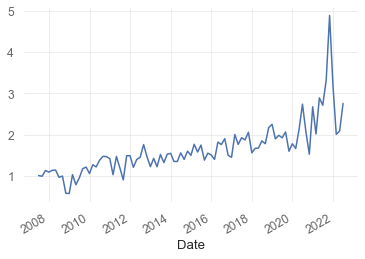

In [151]:
synthetic_momentum_index.plot()

<AxesSubplot:xlabel='Date'>

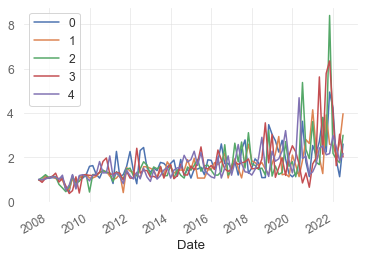

In [138]:
synthetic_momentum_data.plot()

<AxesSubplot:xlabel='Date'>

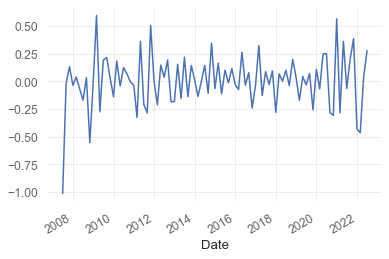

In [152]:
synthetic_momentum_returns.plot()

Construyo todos los índices

In [153]:
synthetic_momentum_index, synthetic_momentum_returns, synthetic_momentum_data = calcular_sintetico(cartera_momentum, precio_cero_resample)
synthetic_sharpe_index, synthetic_sharpe_returns, synthetic_sharpe_data = calcular_sintetico(cartera_sharpe, precio_cero_resample)
synthetic_media_index, synthetic_media_returns, synthetic_media_data = calcular_sintetico(cartera_media, precio_cero_resample)
synthetic_alpha_index, synthetic_alpha_returns, synthetic_alpha_data = calcular_sintetico(cartera_alpha, precio_cero_resample)
synthetic_beta_index, synthetic_beta_returns, synthetic_beta_data = calcular_sintetico(cartera_beta, precio_cero_resample)

Construyo un df con mis índices

En primer lugar, tengo que calcular los retornos del EW

In [162]:
ew_index_base_cero_returns = np.log(ew_index_base_cero).diff().dropna(axis=0)

In [166]:
indexes = pd.DataFrame(ew_index_base_cero_returns, columns=['EW'])


Meto los datos de mis índices sintéticos

In [171]:
indexes['Momentum'] = synthetic_momentum_returns
indexes['Media'] = synthetic_media_returns
indexes['Sharpe'] = synthetic_sharpe_returns
indexes['Alpha_Jensen'] = synthetic_alpha_returns
indexes['Beta'] = synthetic_beta_returns

El problema que va a tener esto es que nos vamos a comer parte del histórico de datos...Quitando los NAs de los retornos, nos vamos a 2008

In [172]:
indexes.dropna(axis=0)

,EW,Momentum,Media,Sharpe,Alpha_Jensen,Beta
Date,,,,,,
2007-08-31,0.006212,-0.016510,-0.016510,-0.016510,-0.016510,-0.016510
2007-10-31,0.006855,0.133395,0.133395,0.133395,0.133395,0.133395
2007-12-31,-0.002228,-0.036076,-0.036076,-0.036076,-0.036076,-0.036076
2008-02-29,-0.010040,0.039872,0.039872,0.039872,0.039872,0.039872
2008-06-30,0.003275,-0.170239,-0.170239,-0.170239,-0.170239,-0.170239
...,...,...,...,...,...,...
2021-04-30,-0.003223,0.362200,0.362200,0.362200,0.362200,0.362200
2021-06-30,0.001746,-0.063764,-0.063764,-0.063764,-0.063764,-0.063764
2021-08-31,-0.001474,0.203333,0.203333,0.203333,0.203333,0.203333


<AxesSubplot:xlabel='Date'>

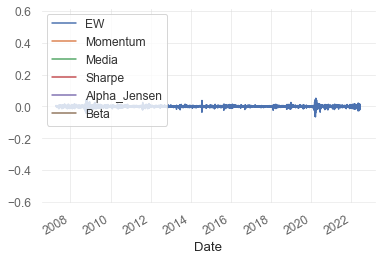

In [174]:
indexes.plot()

Miro los índices con precio para comparar

In [177]:
indexes_precio = pd.DataFrame(ew_index_base_cero, columns=['EW'])
indexes_precio['Momentum'] = synthetic_momentum_index
indexes_precio['Media'] = synthetic_media_index
indexes_precio['Sharpe'] = synthetic_sharpe_index
indexes_precio['Alpha_Jensen'] = synthetic_alpha_index
indexes_precio['Beta'] = synthetic_beta_index
indexes_precio.dropna(axis=0, inplace=True)

In [178]:
indexes_precio.head()

,EW,Momentum,Media,Sharpe,Alpha_Jensen,Beta
Date,,,,,,
2007-08-31,1.015424,0.984217,0.984217,0.984217,0.984217,0.984217
2007-10-31,1.062571,1.124666,1.124666,1.124666,1.124666,1.124666
2007-12-31,1.049871,1.084816,1.084816,1.084816,1.084816,1.084816
2008-02-29,1.022988,1.128943,1.128943,1.128943,1.128943,1.128943
2008-04-30,1.041298,1.134965,1.134965,1.134965,1.134965,1.134965


C:\Users\Z840\AppData\Local\Temp/ipykernel_6412/978766969.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  indexes_precio['2018'].plot()


<AxesSubplot:xlabel='Date'>

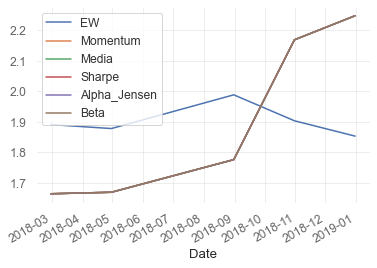

In [180]:
indexes_precio['2018'].plot()